# Bank Churn Prediction

## Description

### Background & Context

Businesses like banks that provide service have to worry about the problem of 'Churn' i.e. customers leaving and joining another service provider. It is important to understand which aspects of the service influence a customer's decision in this regard. Management can concentrate efforts on the improvement of service, keeping in mind these priorities.

### Objective

Given a Bank customer, build a neural network-based classifier that can determine whether they will leave or not in the next 6 months.

### Data Description

The dataset contains 10,000 sample points with 14 distinct features such as CustomerId, CreditScore, Geography, Gender, Age, Tenure, Balance, etc.

### Data Dictionary

- CustomerId: Unique ID which is assigned to each customer
- Surname: Last name of the customer 
- CreditScore: It defines the credit history of the customer.  
- Geography: A customer’s location    
- Gender: It defines the Gender of the customer   
- Age: Age of the customer     
- Tenure: Number of years for which the customer has been with the bank
- NumOfProducts: It refers to the number of products that a customer has purchased through the bank.
- Balance: Account balance
- HasCrCard: It is a categorical variable that decides whether the customer has a credit card or not.
- EstimatedSalary: Estimated salary 
- isActiveMember: It is a categorical variable that decides whether the customer is an active member of the bank or not ( Active member in the sense, using bank products regularly, making transactions, etc )
- Exited: It is a categorical variable that decides whether the customer left the bank within six months or not. It can take two values 
    - 0=No ( Customer did not leave the bank )
    - 1=Yes ( Customer left the bank )

### Assumptions
1. The dataset does not contain adequate demographic information to make reasonable inferences about customers and their interactions with the bank. 
2. The dataset does not give any indication about the nature of inactivity of customers (whether they were inactive for long periods, or intermittently)
3. While the dataset indicates the number of products a customer has, it does not indicate what kind of products these are. This information would be helpful when dealing with outliers or other data anomalies.
4. There is no indication why only an estimation of the salary was used for the purpose of this dataset. If the actuals vary by a lot, then it is possible the inferences from the dataset could change. 

### Introductory Steps

#### Importing Libraries

In [1]:
# Libraries to help with reading and manipulating data
import pandas as pd
import numpy as np

# Libraries to help with data visualization
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

# for model selection and random searches
from sklearn import model_selection
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV


# for scaling and encoding
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MinMaxScaler


# for clearning memory and setting seeds
from tensorflow.keras import backend
import random

random.seed(1)
np.random.seed(1)


# for plotting ROC-AUC curves
from sklearn.metrics import roc_curve
from matplotlib import pyplot


# To get metric scores, and split data
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.metrics import (
    f1_score,
    accuracy_score,
    recall_score,
    precision_score,
    confusion_matrix,
    roc_auc_score,
)

# for oversampling
from imblearn.over_sampling import SMOTE

# import tensorflow and keras
import tensorflow as tf

tf.random.set_seed(1)
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input, Dropout, BatchNormalization
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier
from tensorflow.keras.optimizers import Adam
from tensorflow import keras
from tensorflow.keras import layers
from keras_tuner.tuners import RandomSearch

# Supress warnings
import warnings

warnings.filterwarnings("ignore")

# To define maximum number of columns to be displayed in a dataframe
pd.set_option("display.max_columns", None)

# To supress scientific notations for a dataframe
pd.set_option("display.float_format", lambda x: "%.3f" % x)

# This will help in making the Python code more structured automatically 
%load_ext nb_black

<IPython.core.display.Javascript object>

### Loading the Data

In [2]:
# loading the data
Data = pd.read_csv("Churn.csv")

<IPython.core.display.Javascript object>

In [3]:
# check the number of rows and columns
Data.shape

(10000, 14)

<IPython.core.display.Javascript object>

In [4]:
# Let's view the first 5 rows of the data
Data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.000,1,1,1,101348.880,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.860,1,0,1,112542.580,0
2,3,15619304,Onio,502,France,Female,42,8,159660.800,3,1,0,113931.570,1
3,4,15701354,Boni,699,France,Female,39,1,0.000,2,0,0,93826.630,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.820,1,1,1,79084.100,0


<IPython.core.display.Javascript object>

In [5]:
# Let's view the last 5 rows of the data
Data.tail()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.000,2,1,0,96270.640,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.610,1,1,1,101699.770,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.000,1,0,1,42085.580,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.310,2,1,0,92888.520,1
9999,10000,15628319,Walker,792,France,Female,28,4,130142.790,1,1,0,38190.780,0


<IPython.core.display.Javascript object>

In [6]:
# Let's check the datatypes of the columns in the dataset
Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


<IPython.core.display.Javascript object>

In [7]:
# Let's check for duplicate values in the data
Data.duplicated().sum()

0

<IPython.core.display.Javascript object>

In [8]:
Data["Exited"].value_counts(1)

0   0.796
1   0.204
Name: Exited, dtype: float64

<IPython.core.display.Javascript object>

In [9]:
# Let's view the statistical summary of the numerical columns in the data
Data.describe().T

,count,mean,std,min,25%,50%,75%,max
RowNumber,10000.000,5000.500,2886.896,1.000,2500.750,5000.500,7500.250,10000.000
CustomerId,10000.000,15690940.569,71936.186,15565701.000,15628528.250,15690738.000,15753233.750,15815690.000
CreditScore,10000.000,650.529,96.653,350.000,584.000,652.000,718.000,850.000
Age,10000.000,38.922,10.488,18.000,32.000,37.000,44.000,92.000
Tenure,10000.000,5.013,2.892,0.000,3.000,5.000,7.000,10.000
Balance,10000.000,76485.889,62397.405,0.000,0.000,97198.540,127644.240,250898.090
NumOfProducts,10000.000,1.530,0.582,1.000,1.000,1.000,2.000,4.000
HasCrCard,10000.000,0.706,0.456,0.000,0.000,1.000,1.000,1.000
IsActiveMember,10000.000,0.515,0.500,0.000,0.000,1.000,1.000,1.000
EstimatedSalary,10000.000,100090.240,57510.493,11.580,51002.110,100193.915,149388.247,199992.480


<IPython.core.display.Javascript object>

In [10]:
# Let's check the number of unique values in each column
Data.nunique()

RowNumber          10000
CustomerId         10000
Surname             2932
CreditScore          460
Geography              3
Gender                 2
Age                   70
Tenure                11
Balance             6382
NumOfProducts          4
HasCrCard              2
IsActiveMember         2
EstimatedSalary     9999
Exited                 2
dtype: int64

<IPython.core.display.Javascript object>

In [11]:
for i in Data.describe(include=["object"]).columns:
    print("Unique values in", i, "are :")
    print(Data[i].value_counts())
    print("*" * 50)

Unique values in Surname are :
Smith       32
Scott       29
Martin      29
Walker      28
Brown       26
            ..
Izmailov     1
Bold         1
Bonham       1
Poninski     1
Burbidge     1
Name: Surname, Length: 2932, dtype: int64
**************************************************
Unique values in Geography are :
France     5014
Germany    2509
Spain      2477
Name: Geography, dtype: int64
**************************************************
Unique values in Gender are :
Male      5457
Female    4543
Name: Gender, dtype: int64
**************************************************


<IPython.core.display.Javascript object>

##### Observations

1. There are 10000 rows and 14 columns in the dataset. 
2. There does not seem to be any null values in any of the columns. We can investigate this further again. 
3. The dataset is imbalanced, with 80% customers who have not left the bank and only 20% leaving the bank. 
4. There are three unique values in the Geography column - France, Germany and Spain, with the largest number of customers in France. 
5. Male and female customers are almost equal in proportion. 
6. There does not seem to be any duplicated rows in the dataset. 

### EDA

Before beginning with the EDA, we can define the functions required to build the necessary plots. 

In [12]:
# Function to plot a boxplot and a histogram along the same scale.


def histogram_boxplot(data, feature, figsize=(12, 7), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (12,7))
    kde: whether to the show density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a star will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins, palette="winter"
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

<IPython.core.display.Javascript object>

In [13]:
# Function to create labeled barplots
def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 1, 5))
    else:
        plt.figure(figsize=(n + 1, 5))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n].sort_values(),
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

<IPython.core.display.Javascript object>

In [14]:
### Function to plot distributions
def distribution_plot_wrt_target(data, predictor, target):

    fig, axs = plt.subplots(2, 2, figsize=(12, 10))

    target_uniq = data[target].unique()

    axs[0, 0].set_title("Distribution of target for target=" + str(target_uniq[0]))
    sns.histplot(
        data=data[data[target] == target_uniq[0]],
        x=predictor,
        kde=True,
        ax=axs[0, 0],
        color="teal",
    )

    axs[0, 1].set_title("Distribution of target for target=" + str(target_uniq[1]))
    sns.histplot(
        data=data[data[target] == target_uniq[1]],
        x=predictor,
        kde=True,
        ax=axs[0, 1],
        color="orange",
    )

    axs[1, 0].set_title("Boxplot w.r.t target")
    sns.boxplot(data=data, x=target, y=predictor, ax=axs[1, 0], palette="gist_rainbow")

    axs[1, 1].set_title("Boxplot (without outliers) w.r.t target")
    sns.boxplot(
        data=data,
        x=target,
        y=predictor,
        ax=axs[1, 1],
        showfliers=False,
        palette="gist_rainbow",
    )

    plt.tight_layout()
    plt.show()

<IPython.core.display.Javascript object>

In [15]:
# function to plot stacked bar chart
def stacked_barplot(data, predictor, target):
    """
    Print the category counts and plot a stacked bar chart

    data: dataframe
    predictor: independent variable
    target: target variable
    """
    count = data[predictor].nunique()
    sorter = data[target].value_counts().index[-1]
    tab1 = pd.crosstab(data[predictor], data[target], margins=True).sort_values(
        by=sorter, ascending=False
    )
    print(tab1)
    print("-" * 120)
    tab = pd.crosstab(data[predictor], data[target], normalize="index").sort_values(
        by=sorter, ascending=False
    )
    tab.plot(kind="bar", stacked=True, figsize=(count + 1, 5))
    plt.legend(
        loc="lower left", frameon=False,
    )
    plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
    plt.show()

<IPython.core.display.Javascript object>

### Univariate Analysis

Let's begin with the univariate analysis of features. We will not examine features that are not relevant, such as:
- RowNumber
- CustomerId
- Surname

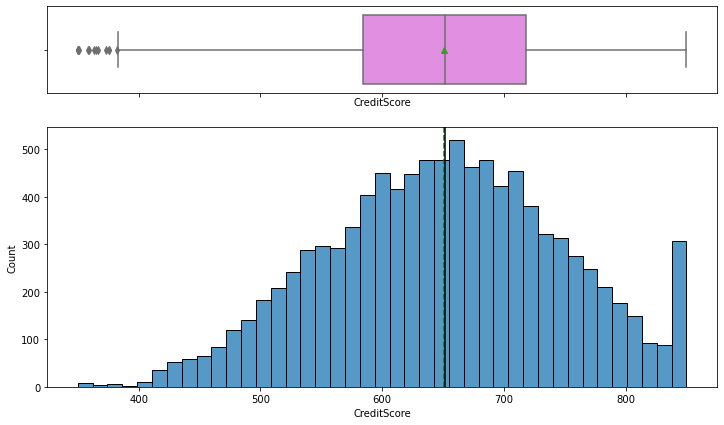

<IPython.core.display.Javascript object>

In [16]:
# plot histogram and boxplot for CreditScore
histogram_boxplot(Data, "CreditScore")

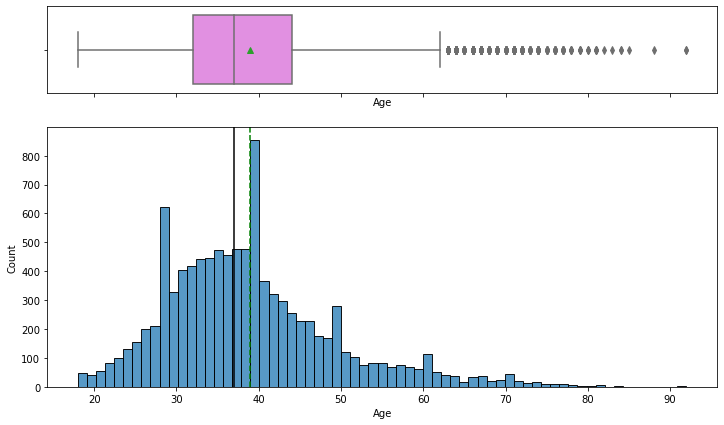

<IPython.core.display.Javascript object>

In [17]:
# plot histogram and boxplot for Age
histogram_boxplot(Data, "Age")

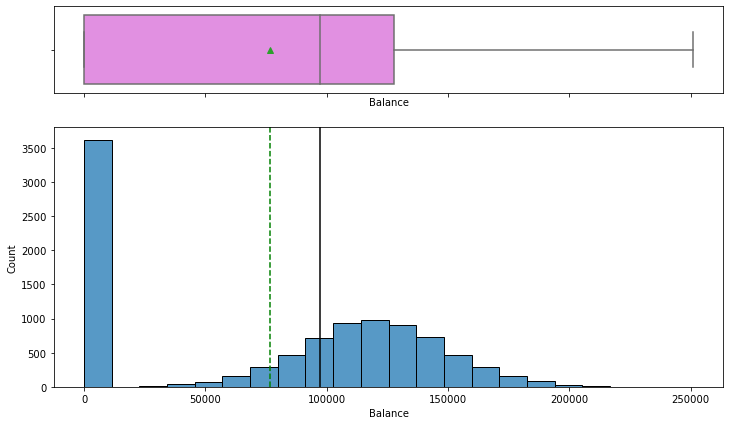

<IPython.core.display.Javascript object>

In [18]:
# plot histogram and boxplot for Balance
histogram_boxplot(Data, "Balance")

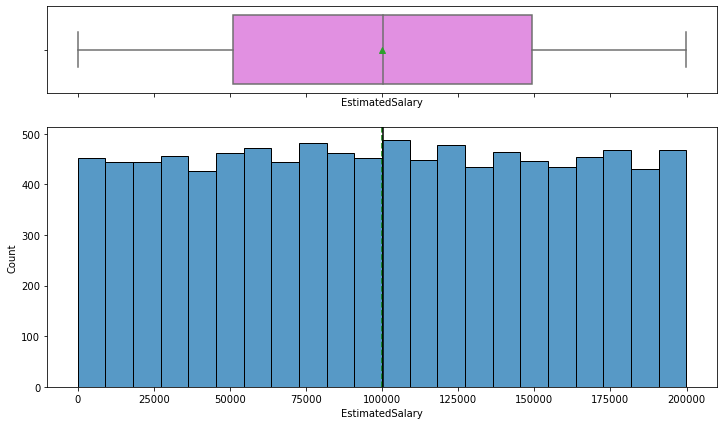

<IPython.core.display.Javascript object>

In [19]:
# plot histogram and boxplot for EstimatedSalary
histogram_boxplot(Data, "EstimatedSalary")

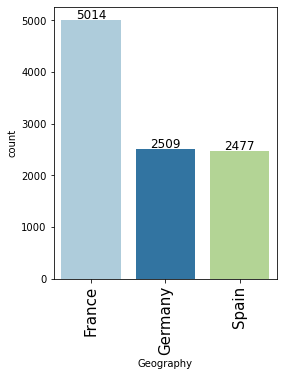

<IPython.core.display.Javascript object>

In [20]:
# plot barplot for Geography
labeled_barplot(Data, "Geography")

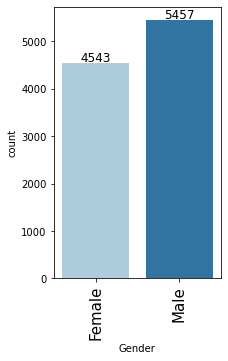

<IPython.core.display.Javascript object>

In [21]:
# plot barplot for Gender
labeled_barplot(Data, "Gender")

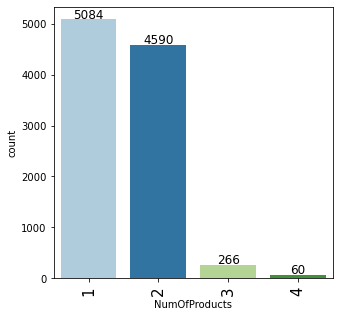

<IPython.core.display.Javascript object>

In [22]:
# plot barplot for NumOfProducts
labeled_barplot(Data, "NumOfProducts")

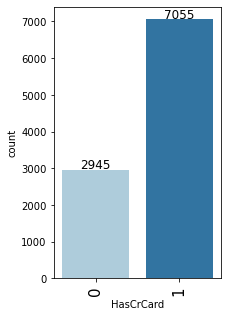

<IPython.core.display.Javascript object>

In [23]:
# plot barplot for HasCrCard
labeled_barplot(Data, "HasCrCard")

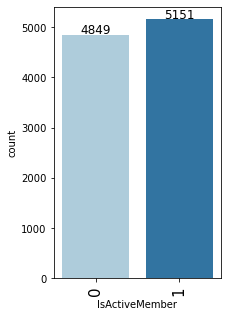

<IPython.core.display.Javascript object>

In [24]:
# plot barplot for IsActiveMember
labeled_barplot(Data, "IsActiveMember")

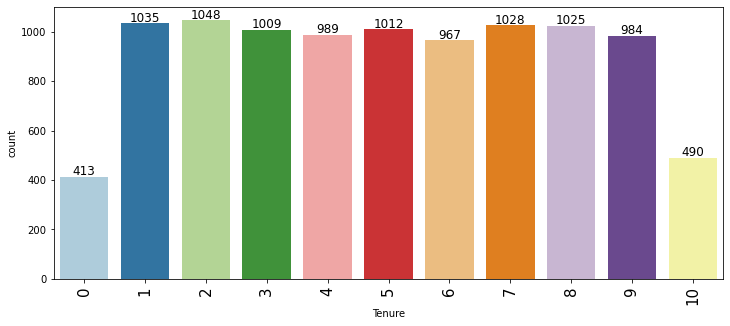

<IPython.core.display.Javascript object>

In [25]:
# plot barplot for Tenure
labeled_barplot(Data, "Tenure")

0    7963
1    2037
Name: Exited, dtype: int64


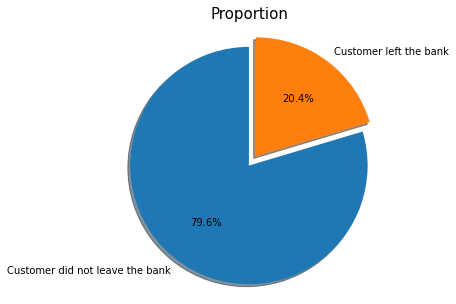

<IPython.core.display.Javascript object>

In [26]:
# plotting a pie chart for target variable
print(Data.Exited.value_counts())
labels = "Customer did not leave the bank", "Customer left the bank"
sizes = [
    Data.Exited[Data["Exited"] == 0].count(),
    Data.Exited[Data["Exited"] == 1].count(),
]
explode = (0, 0.1)
fig1, ax1 = plt.subplots(figsize=(7, 5))
ax1.pie(
    sizes, explode=explode, labels=labels, autopct="%1.1f%%", shadow=True, startangle=90
)
ax1.axis("equal")
plt.title("Proportion", size=15)
plt.show()

##### Observations from univariate analysis

1. Mean and median credit score is around 650 points. CreditScore is almost left skewed, with outliers towards the left. 
2. Age is heavily right skewed with many outliers to the right. Median age is around 37.
3. Balance has an unusual distribution. There seems to be many customers with 0 balance. Median Balance is around 97000. 
4. Mean and median of EstimatedSalary coincide at 100,000. EstimatedSalary ranges between 0 to 200,000. 
5. Most customers are from France. German and Spanish customers are almost equal in number. 
6. The count of male customers are slightly higher than female customers, 5457 against 4543. 
7. Most of the customers hold only 1 or 2 products. Only very few customers hold 3 or more products. 
8. More than 7000 customers hold a credit card. 
9. More than half of the dataset are active customers, engaging frequently with the bank. 
10. Most customers hold tenure between 1-9 years. Very few customers hold shorter tenure than 1 year or greater tenure than 9 years. 
11. 80% of the customers in the dataset did not leave the bank, whereas 20% did. 

### Multivariate Analysis

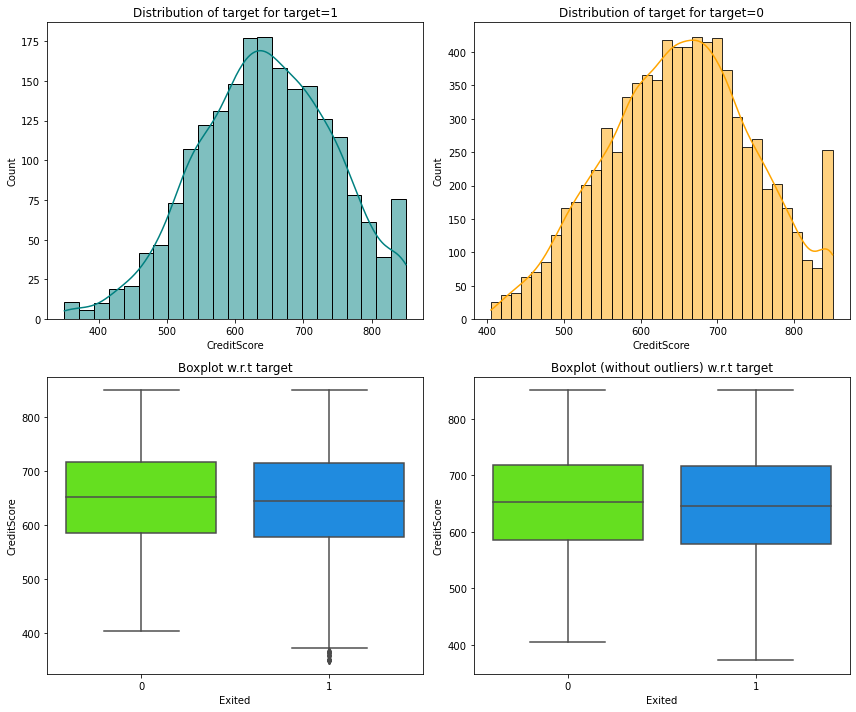

<IPython.core.display.Javascript object>

In [27]:
# distribution plot of target variable vs CreditScore
distribution_plot_wrt_target(Data, "CreditScore", "Exited")

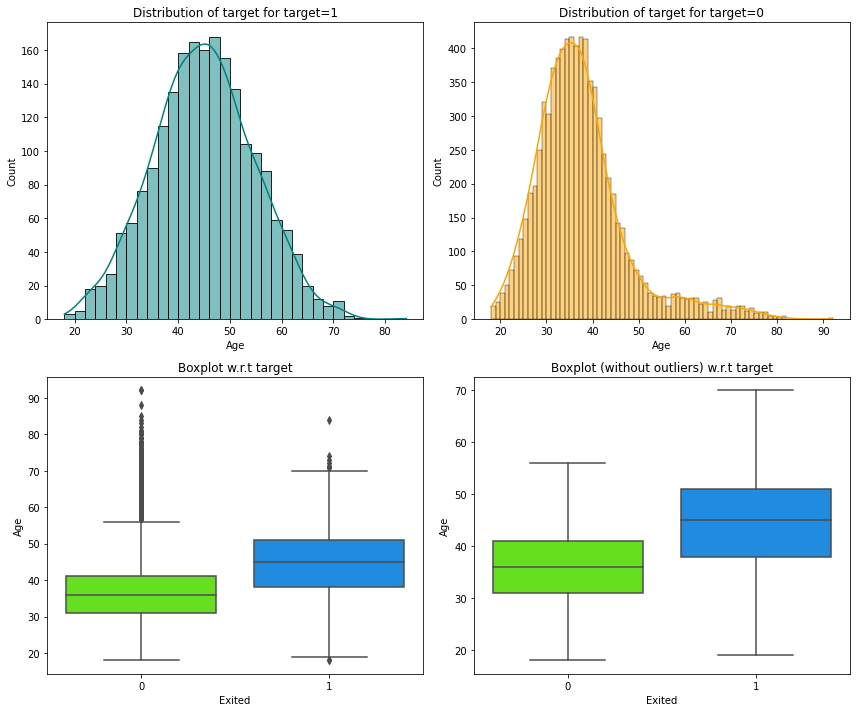

<IPython.core.display.Javascript object>

In [28]:
# distribution plot of target variable vs Age
distribution_plot_wrt_target(Data, "Age", "Exited")

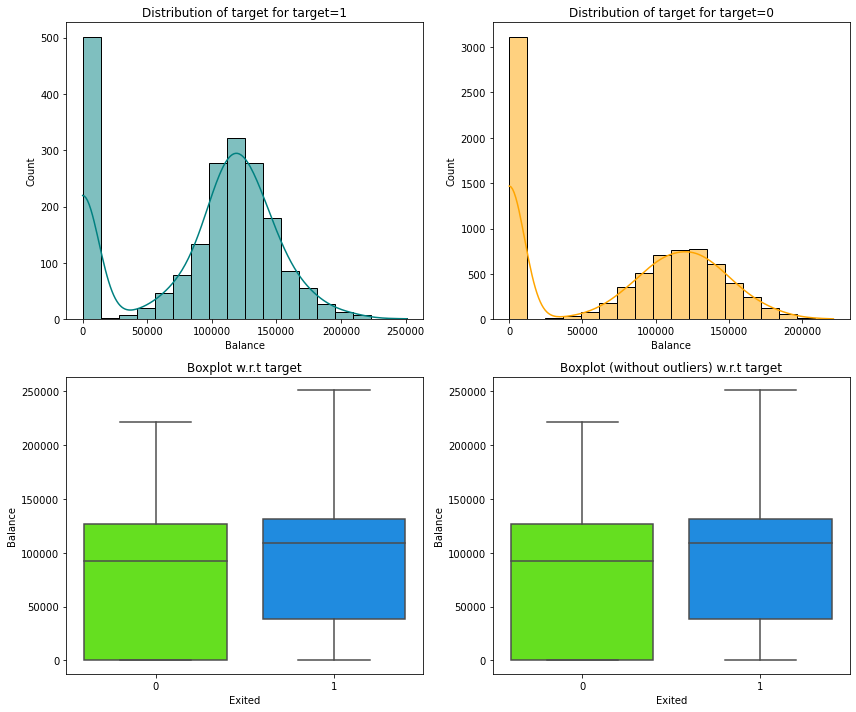

<IPython.core.display.Javascript object>

In [29]:
# distribution plot of target variable vs Balance
distribution_plot_wrt_target(Data, "Balance", "Exited")

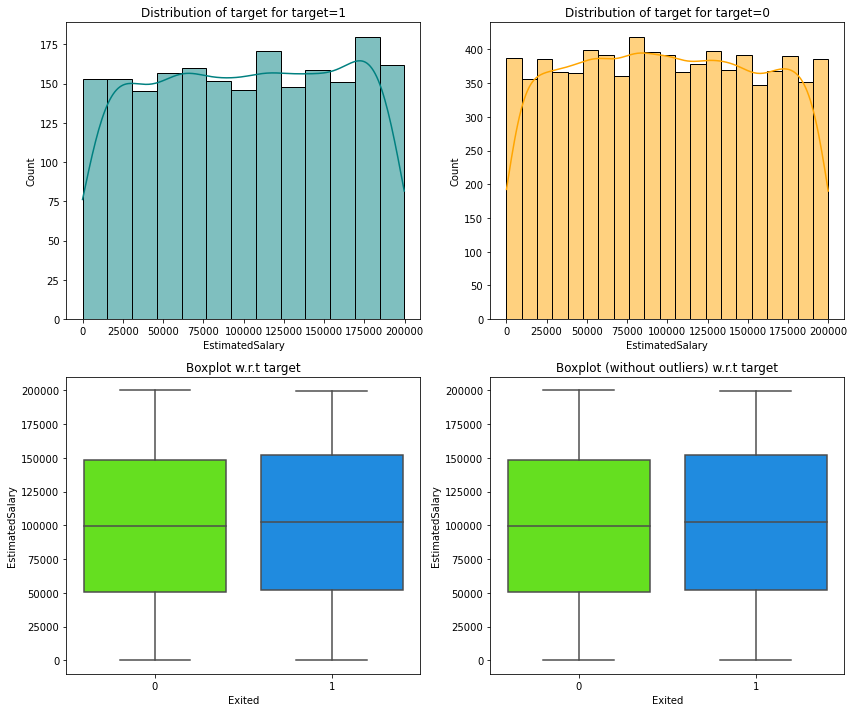

<IPython.core.display.Javascript object>

In [30]:
# distribution plot of target variable vs EstimatedSalary
distribution_plot_wrt_target(Data, "EstimatedSalary", "Exited")

##### Observations from distribution plot analysis

1. CreditScore, Balance, EstimatedSalary distributions and boxplots don't show much distinction when distinguished by the target variable. 
2. There is a distinct difference in the Age distribution when separated by the target variable. The median age of the customers who exited the bank is higher than the customers who did not exit. 

Exited     0     1    All
Gender                   
All     7963  2037  10000
Female  3404  1139   4543
Male    4559   898   5457
------------------------------------------------------------------------------------------------------------------------


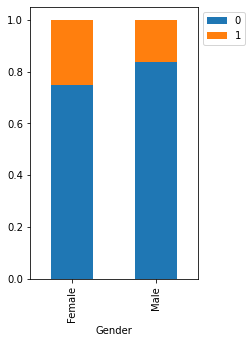

<IPython.core.display.Javascript object>

In [31]:
# barplot for target variable vs Gender
stacked_barplot(Data, "Gender", "Exited")

Exited        0     1    All
Geography                   
All        7963  2037  10000
Germany    1695   814   2509
France     4204   810   5014
Spain      2064   413   2477
------------------------------------------------------------------------------------------------------------------------


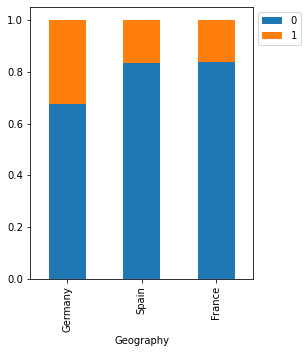

<IPython.core.display.Javascript object>

In [32]:
# barplot for target variable vs Geography
stacked_barplot(Data, "Geography", "Exited")

Exited     0     1    All
Tenure                   
All     7963  2037  10000
1        803   232   1035
3        796   213   1009
9        771   213    984
5        803   209   1012
4        786   203    989
2        847   201   1048
8        828   197   1025
6        771   196    967
7        851   177   1028
10       389   101    490
0        318    95    413
------------------------------------------------------------------------------------------------------------------------


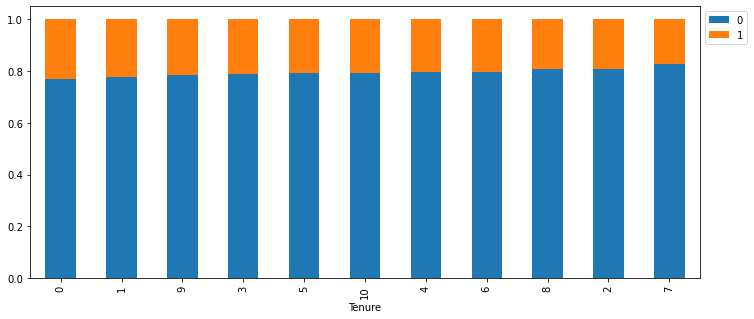

<IPython.core.display.Javascript object>

In [33]:
# barplot for target variable vs Tenure
stacked_barplot(Data, "Tenure", "Exited")

Exited            0     1    All
NumOfProducts                   
All            7963  2037  10000
1              3675  1409   5084
2              4242   348   4590
3                46   220    266
4                 0    60     60
------------------------------------------------------------------------------------------------------------------------


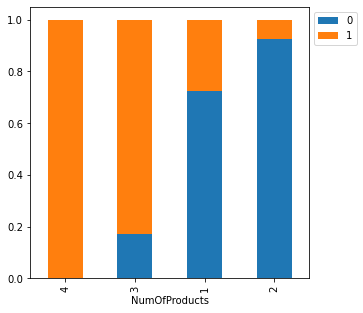

<IPython.core.display.Javascript object>

In [34]:
# barplot for target variable vs NumOfProducts
stacked_barplot(Data, "NumOfProducts", "Exited")

Exited        0     1    All
HasCrCard                   
All        7963  2037  10000
1          5631  1424   7055
0          2332   613   2945
------------------------------------------------------------------------------------------------------------------------


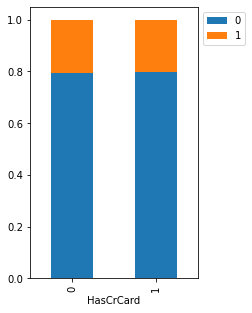

<IPython.core.display.Javascript object>

In [35]:
# barplot for target variable vs HasCrCard
stacked_barplot(Data, "HasCrCard", "Exited")

Exited             0     1    All
IsActiveMember                   
All             7963  2037  10000
0               3547  1302   4849
1               4416   735   5151
------------------------------------------------------------------------------------------------------------------------


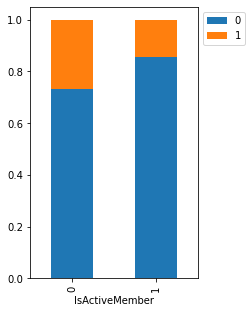

<IPython.core.display.Javascript object>

In [36]:
# barplot for target variable vs IsActiveMember
stacked_barplot(Data, "IsActiveMember", "Exited")

##### Observations from barplot analysis of categorical and object variables

1. More female customers tend to exit the bank than male customers.
2. Even though most customers are France, it is surprising to note than customers who exit are mostly from Germany. 
3. Tenure does not seem to have an influence on customers exiting the bank. 
4. Even though only very few customers hold 3 or more products, most of the customers who exit the bank come from these categories. Customers holding 2 products seem less likely to leave the bank. 
4. Having a credit card does not seem to have an influence on customers exiting the bank. 
5. Customers who are not active with the bank are more likely to leave the bank.  

In [37]:
# declaring a list of numerical columns for further plotting

num_cols = [
    "CreditScore",
    "Age",
    "Tenure",
    "Balance",
    "NumOfProducts",
    "HasCrCard",
    "IsActiveMember",
    "EstimatedSalary",
    "Exited",
]

<IPython.core.display.Javascript object>

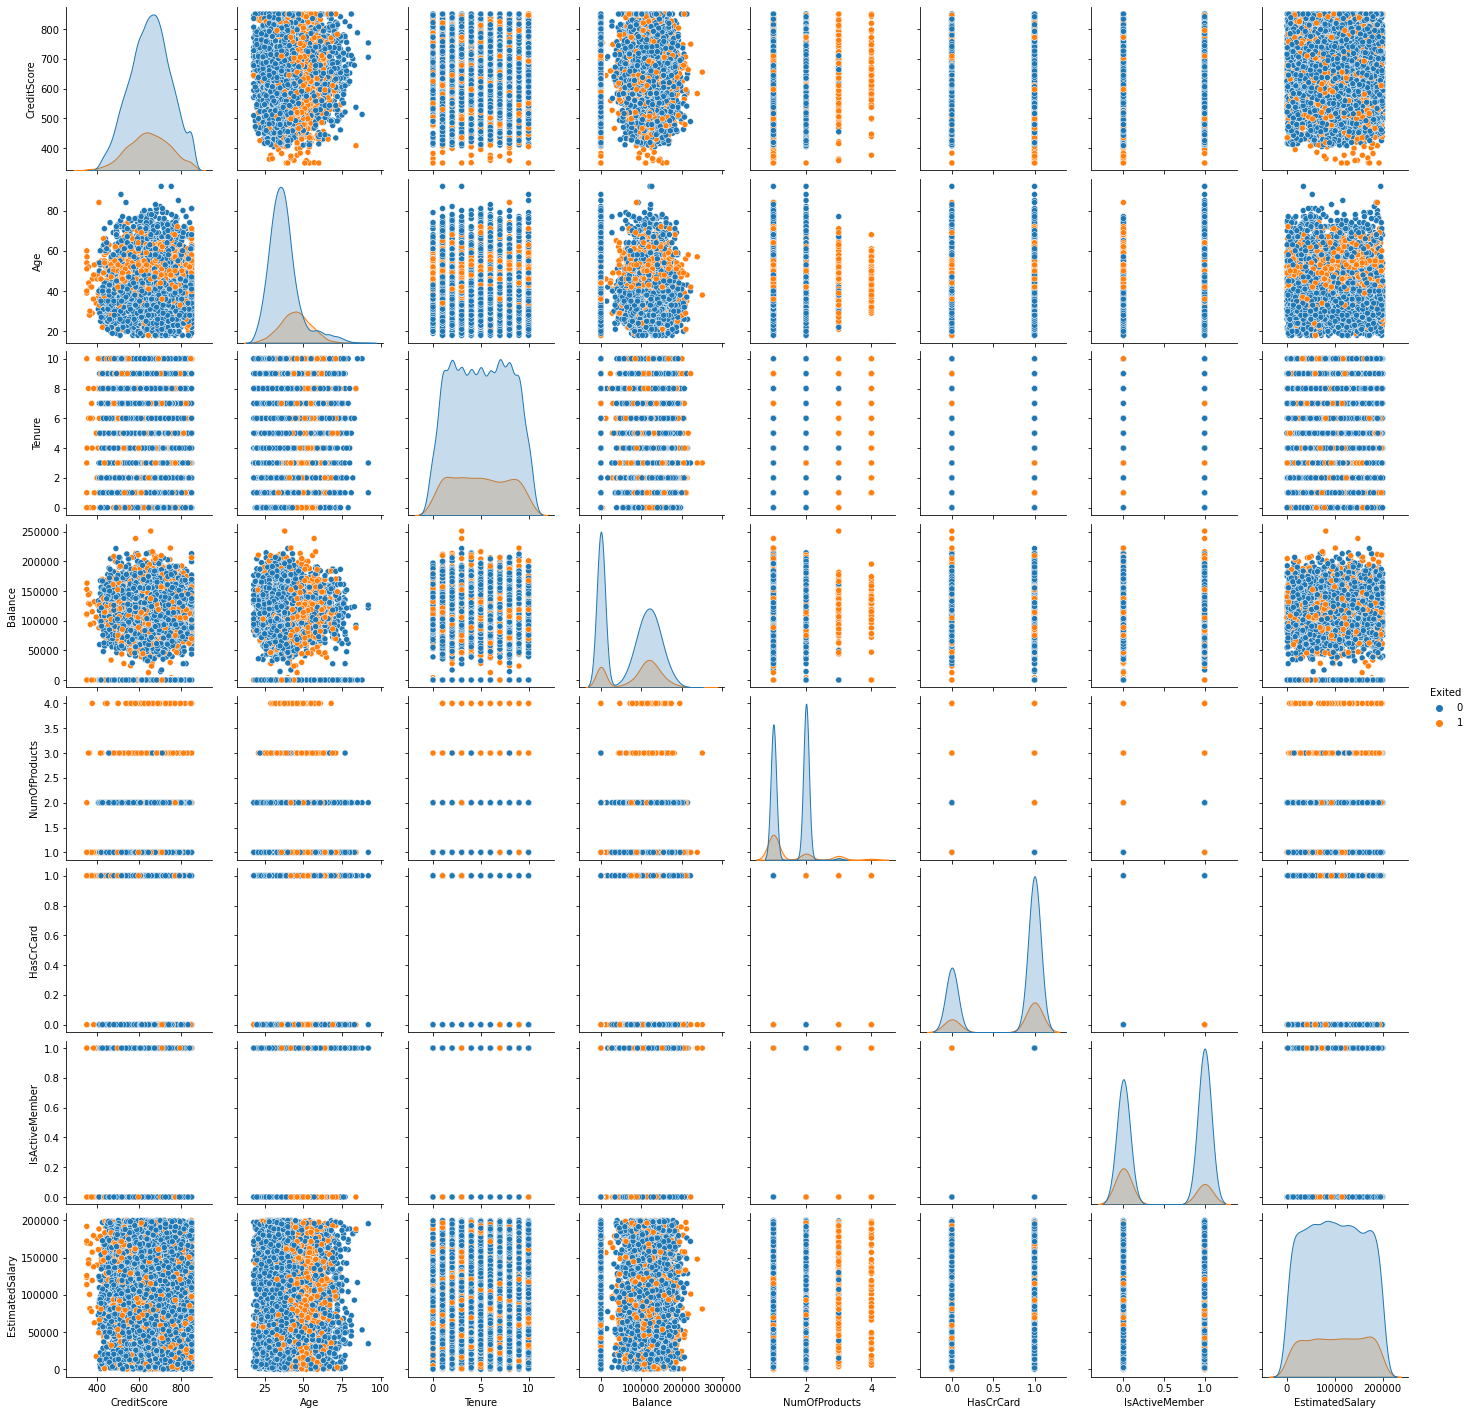

<IPython.core.display.Javascript object>

In [38]:
# plotting a pairplot
sns.pairplot(data=Data[num_cols], diag_kind="kde", hue="Exited")
plt.show()

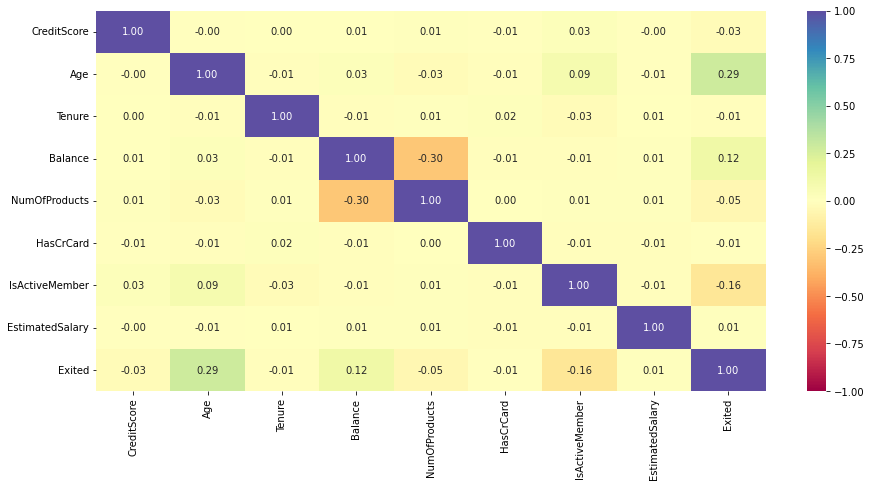

<IPython.core.display.Javascript object>

In [39]:
# plotting a correlation heatmap
plt.figure(figsize=(15, 7))
sns.heatmap(
    Data[num_cols].corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral"
)
plt.show()

##### Observations from pairplots and correlation heatmaps

1. There are only weak correlations, whether positive or negative, in the correlation heatmap. 
2. From the pairplot we have verified the observations we saw in the previous multivariate plots. 

### Outlier Detection

We have noticed outliers in CreditScore and Age feature columns, let's investigate these outliers and take appropriate steps.

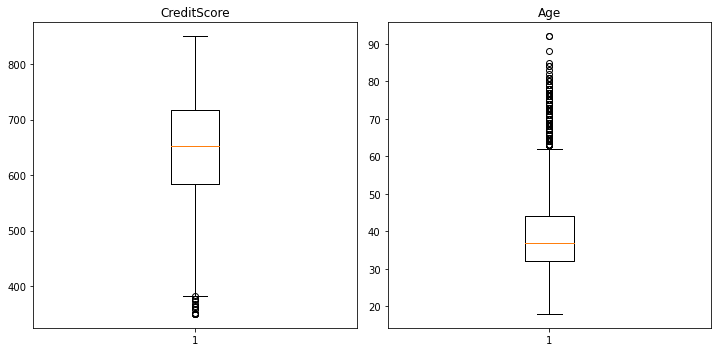

<IPython.core.display.Javascript object>

In [40]:
# declaring the outlier columns as a list
# plotting a boxplot for the outlier features

outlier_col = ["CreditScore", "Age"]
plt.figure(figsize=(15, 5))

for i, variable in enumerate(outlier_col):
    plt.subplot(1, 3, i + 1)
    plt.boxplot(Data[variable], whis=1.5)
    plt.tight_layout()
    plt.title(variable)

plt.show()

In [41]:
# calculating the Q1 and Q3 values outside of which outliers exist
# this code will print the columns with the number of outliers, and the upper and lower limits of the outliers
for col in outlier_col:
    quartiles = np.quantile(Data[col], [0.25, 0.75])
    Q1 = quartiles[0]
    Q3 = quartiles[1]
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    outliers = np.logical_or(Data[col] < lower, Data[col] > upper)
    print(
        "Number of Outliers in", col, "are", outliers.sum(),
    )
    if outliers.sum() > 0:
        if lower > 0:
            print("Outlier values of", col, "are lower than", f"{lower}")
        if upper > 0:
            print("Outlier values of", col, "are greater than", f"{upper}")
    print("\n")

Number of Outliers in CreditScore are 15
Outlier values of CreditScore are lower than 383.0
Outlier values of CreditScore are greater than 919.0


Number of Outliers in Age are 359
Outlier values of Age are lower than 14.0
Outlier values of Age are greater than 62.0




<IPython.core.display.Javascript object>

##### Observations about outliers
1. There are 15 outliers in CreditScore column and 359 in Age column. 
2. The 15 outliers in CreditScore are lower than 383 points, as observed in the boxplot. 
3. The 359 outliers in Age are greater than 62, as observed in the boxplot.

In [42]:
# isolating the outlier in CreditScore into a separate dataframe
outlier_cs = Data[Data["CreditScore"] < 383.0]
outlier_cs

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
7,8,15656148,Obinna,376,Germany,Female,29,4,115046.740,4,1,0,119346.880,1
942,943,15804586,Lin,376,France,Female,46,6,0.000,1,1,0,157333.690,1
1193,1194,15779947,Thomas,363,Spain,Female,28,6,146098.430,3,1,0,100615.140,1
1405,1406,15612494,Panicucci,359,France,Female,44,6,128747.690,1,1,0,146955.710,1
1631,1632,15685372,Azubuike,350,Spain,Male,54,1,152677.480,1,1,1,191973.490,1
1838,1839,15758813,Campbell,350,Germany,Male,39,0,109733.200,2,0,0,123602.110,1
1962,1963,15692416,Aikenhead,358,Spain,Female,52,8,143542.360,3,1,0,141959.110,1
2473,2474,15679249,Chou,351,Germany,Female,57,4,163146.460,1,1,0,169621.690,1
2579,2580,15597896,Ozoemena,365,Germany,Male,30,0,127760.070,1,1,0,81537.850,1
8154,8155,15791533,Ch'ien,367,Spain,Male,42,6,93608.280,1,1,0,168816.730,1


<IPython.core.display.Javascript object>

In [43]:
# isolating the outlier in Age  into a separate dataframe
outlier_age = Data[Data["Age"] > 62.0]
outlier_age

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
58,59,15623944,T'ien,511,Spain,Female,66,4,0.000,1,1,0,1643.110,1
85,86,15805254,Ndukaku,652,Spain,Female,75,10,0.000,2,1,1,114675.750,0
104,105,15804919,Dunbabin,670,Spain,Female,65,1,0.000,1,1,1,177655.680,1
158,159,15589975,Maclean,646,France,Female,73,6,97259.250,1,0,1,104719.660,0
181,182,15789669,Hsia,510,France,Male,65,2,0.000,2,1,1,48071.610,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9753,9754,15705174,Chiedozie,656,Germany,Male,68,7,153545.110,1,1,1,186574.680,0
9765,9766,15777067,Thomas,445,France,Male,64,2,136770.670,1,0,1,43678.060,0
9832,9833,15814690,Chukwujekwu,595,Germany,Female,64,2,105736.320,1,1,1,89935.730,1
9894,9895,15704795,Vagin,521,France,Female,77,6,0.000,2,1,1,49054.100,0


<IPython.core.display.Javascript object>

##### Actions taken for outliers

1. It seems that the outliers are not invalid, especially considering the banking domain. 
2. Given the information we have, we will not take any additional steps to correct or drop the rows. We will retain them as valid data. 


#### Verifying the 0 values in Balance 

During our EDA, we had noticed that the Balance column contained a few 0 values. Let's analyse them and take any steps to correct them if needed. 

In [44]:
# isolating the rows with zero balance into a separate dataframe
balance = Data[Data.Balance == 0.0]
balance

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.000,1,1,1,101348.880,1
3,4,15701354,Boni,699,France,Female,39,1,0.000,2,0,0,93826.630,0
6,7,15592531,Bartlett,822,France,Male,50,7,0.000,2,1,1,10062.800,0
11,12,15737173,Andrews,497,Spain,Male,24,3,0.000,2,1,0,76390.010,0
12,13,15632264,Kay,476,France,Female,34,10,0.000,2,1,0,26260.980,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9989,9990,15605622,McMillan,841,Spain,Male,28,4,0.000,2,1,1,179436.600,0
9992,9993,15657105,Chukwualuka,726,Spain,Male,36,2,0.000,1,1,0,195192.400,0
9994,9995,15719294,Wood,800,France,Female,29,2,0.000,2,0,0,167773.550,0
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.000,2,1,0,96270.640,0


<IPython.core.display.Javascript object>

In [45]:
# checking the counts of target variable
balance.Exited.value_counts()

0    3117
1     500
Name: Exited, dtype: int64

<IPython.core.display.Javascript object>

In [46]:
# checking the counts of IsActiveMember
balance.IsActiveMember.value_counts()

1    1873
0    1744
Name: IsActiveMember, dtype: int64

<IPython.core.display.Javascript object>

##### Observations on zero balance customers

1. A huge number of customers have zero balances ~3600. 
2. There are almost equal proportions of active and inactive customers. 
3. However, most of these customers have not left the bank. 
4. They seem to come from all age and salary groups, and does not seem to have an influence on the number of products owned, or whether they have a credit card or not. 
5. The bank should investigate these high numbers of zero balance customers and understand the reason why they maintain their balance so. 

### Data Preparation

Before starting with modelling, let's prepare the dataset. We can perform the following actions on the dataset:
- Drop columns that are not relevant for modelling ("RowNumber", "CustomerId", "Surname")
- Splitting the dataset into train and test, with stratify option because the dataset is imbalanced and this will help to retain the same target class proportion in the train and test sets. 
- One Hot encoding Geography and Gender features so that no ordering creeps into the model.
- Scaling the dataset using MinMax scalar, so that all features are on the same scale. 

In [47]:
# dropping columns that are not required for modelling
data = Data.drop(columns=["RowNumber", "CustomerId", "Surname",], axis=1)
data

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.000,1,1,1,101348.880,1
1,608,Spain,Female,41,1,83807.860,1,0,1,112542.580,0
2,502,France,Female,42,8,159660.800,3,1,0,113931.570,1
3,699,France,Female,39,1,0.000,2,0,0,93826.630,0
4,850,Spain,Female,43,2,125510.820,1,1,1,79084.100,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,France,Male,39,5,0.000,2,1,0,96270.640,0
9996,516,France,Male,35,10,57369.610,1,1,1,101699.770,0
9997,709,France,Female,36,7,0.000,1,0,1,42085.580,1
9998,772,Germany,Male,42,3,75075.310,2,1,0,92888.520,1


<IPython.core.display.Javascript object>

In [48]:
## Separating Independent and Dependent Columns
X = data.drop(["Exited"], axis=1)
Y = data[["Exited"]]

<IPython.core.display.Javascript object>

In [49]:
# Splitting the dataset into the Training and Testing set, 80:20 proportion.
X_train, X_test, y_train, y_test = train_test_split(
    X, Y, test_size=0.2, random_state=42, stratify=Y
)

<IPython.core.display.Javascript object>

In [50]:
# Checking that no column has missing values in train and test sets
print(X_train.isna().sum())
print("-" * 30)
print(X_test.isna().sum())

CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
dtype: int64
------------------------------
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
dtype: int64


<IPython.core.display.Javascript object>

#### One Hot Encoding categorical columns

In [51]:
# Create a OneHotEncoder object
onehot_encoder = OneHotEncoder(
    sparse=False, handle_unknown="ignore"
)  # setting sparse to False in order to get back an array
cols_to_ohe = ["Gender", "Geography"]

# Fit the encoder on the training set and transform it on all the 3 datasets - training and testing
encoded_columns_train = onehot_encoder.fit_transform(X_train[cols_to_ohe])
# Converting the array into a dataframe
data_train_encoded = pd.DataFrame(
    encoded_columns_train,
    index=X_train.index,
    columns=onehot_encoder.get_feature_names_out(cols_to_ohe),
)
# Extract the columns that were not sent through the onehot encoder
data_other_cols_train = X_train.drop(columns=cols_to_ohe)
# Recreate the dataframe
X_train = pd.concat([data_train_encoded, data_other_cols_train], axis=1)

# Transform the test set
encoded_columns_test = onehot_encoder.transform(X_test[cols_to_ohe])
# Convert the array into a dataframe
data_test_encoded = pd.DataFrame(
    encoded_columns_test,
    index=X_test.index,
    columns=onehot_encoder.get_feature_names_out(cols_to_ohe),
)
# Extract the columns that were not sent through the onehot encoder
data_other_cols_test = X_test.drop(columns=cols_to_ohe)
# Recreate the dataframe
X_test = pd.concat([data_test_encoded, data_other_cols_test], axis=1)

<IPython.core.display.Javascript object>

In [52]:
# using Minscaler
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

<IPython.core.display.Javascript object>

In [53]:
# verifying the X_train after OHE and normalization
X_train

array([[0.        , 1.        , 1.        , ..., 1.        , 0.        ,
        0.79739365],
       [0.        , 1.        , 0.        , ..., 1.        , 0.        ,
        0.3198795 ],
       [1.        , 0.        , 0.        , ..., 1.        , 1.        ,
        0.58697941],
       ...,
       [1.        , 0.        , 1.        , ..., 1.        , 1.        ,
        0.33864839],
       [0.        , 1.        , 0.        , ..., 1.        , 0.        ,
        0.11118907],
       [0.        , 1.        , 0.        , ..., 0.        , 1.        ,
        0.20424055]])

<IPython.core.display.Javascript object>

In [54]:
###Checking the shape of train and test sets
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(8000, 13)
(2000, 13)
(8000, 1)
(2000, 1)


<IPython.core.display.Javascript object>

In [55]:
# printing the percentage of target values in each set after encoding
print("y_train")
display(y_train.value_counts(normalize=True) * 100)
print("\n")
print("y_test")
display(y_test.value_counts(normalize=True) * 100)

y_train


Exited
0        79.625
1        20.375
dtype: float64



y_test


Exited
0        79.650
1        20.350
dtype: float64

<IPython.core.display.Javascript object>

##### Observations after data preparation
1. There are 8000 rows in the train dataset and 2000 rows in the test dataset. 
2. The proportion of y values are maintained in the train and test datasets - in a 80:20 ratio.
3. After data preparation, there are 13 rows in the train dataset.

#### Functions that support model analysis

Let's build some functions that will help to analyse our models and see if the metrics we set are on the right track to achieving good predictions.

1. Confusion Matrix: Since this is a prediction problem, let's build a confusion matrix to understand the how close to the actuals our predictions are. 
2. Score Dataframe: Let's build a dataframe to collect the test scores of all the models we will build. This will help us to compare the models in the end. 


In [56]:
# function to define confusion matrix
def confusion_matrix_sklearn(model, predictors, target, threshold):
    """
    To plot the confusion_matrix with percentages

    model: classifier
    predictors: independent variables
    target: dependent variable
    """
    y_pred = model.predict(predictors)
    y_pred = y_pred > threshold

    cm = confusion_matrix(target, y_pred)
    labels = np.asarray(
        [
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
            for item in cm.flatten()
        ]
    ).reshape(2, 2)

    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=labels, fmt="")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")

<IPython.core.display.Javascript object>

In [57]:
# defining a function to compute different metrics to check performance of a classification model built using sklearn
def model_performance_classification_sklearn(model, predictors, target, threshold):
    """
    Function to compute different metrics to check classification model performance

    model: classifier
    predictors: independent variables
    target: dependent variable
    """

    # predicting using the independent variables
    pred = model.predict(predictors)
    pred = pred > threshold

    acc = accuracy_score(target, pred)  # to compute Accuracy
    recall = recall_score(target, pred)  # to compute Recall
    precision = precision_score(target, pred)  # to compute Precision
    f1 = f1_score(target, pred)  # to compute F1-score

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {"Accuracy": acc, "Recall": recall, "Precision": precision, "F1": f1,},
        index=[0],
    )

    return df_perf

<IPython.core.display.Javascript object>

## Model Building

The target variable **Exited** has the following values

    Customers who left the bank: 1

    Customers who did not leave the bank: 0

#### Prediction Outcomes

When we build the model, the following outcomes can be wrongly predicted.

**Case of False Negative: Predicting that customer will not leave(predicted 0), but actually leaves the bank (actual 1)** i.e., Predicts Negative, but Actually Positive. In this case, the bank would not have targeted this customer for improving relationships and keeping him engaged with the right products. A wrong prediction of this sort can be very expensive to the company by losing the customer as well as the loss of potential fees and other sources of revenue.

**Case of False Positives: Predicting that customer will leave (predicted 1) but the customer does not leave (actual 0).** i.e.,Predicts Positives, but Actually Negative. In this case, when the customer is identified with the potential to attrite, the company would spend resources to improve and continue the relationship with the customer. Of course, in this case loss of resources could have been avoided, but this loss is not as severe as the above case.

**Objective of the model**

The stated objective of the business is to predict which customer is likely to leave the bank, therefore it is necessary to identify as many potential customers as possible who can leave the bank, and reduce False Negatives. Therefore, we must aim at increasing recall.

**Recall** is the metric of interest here. We will attempt to have a good recall here. 

Criteria for success:
A successful model will have the following criteria:
- A recall score of 70% or more. 
- An F1 score of 50% or more and and accuracy score of 80% or more (the verification of F1 score is to ensure that False Positives are not very high, resulting in unnecessary expenses for the bank).
- Good fit on validation datasets, as confirmed through loss-epoch graphs (should not overfit)

In [58]:
# create an empty Dataframe to store scores of all models
final_score_test = pd.DataFrame()
final_score_test.index.name = "Model"

<IPython.core.display.Javascript object>

### Model 1- Default model with 1 hidden layer

In [59]:
backend.clear_session()
# Fixing the seed for random number generators so that we can ensure we receive the same output everytime
np.random.seed(42)
import random

random.seed(42)
tf.random.set_seed(42)

<IPython.core.display.Javascript object>

In our first model, we will just build a simple model with just 1 hidden layer. The first layer will have 64 neurons, followed by a hidden layer with 32 neurons and then the output layer with a sigmoid activation since we except outputs in probabilities.

In [60]:
# Initializing the ANN
model = Sequential()
# input layer with 64 neurons
model.add(Dense(activation="relu", input_dim=X_train.shape[1], units=64,))
# Add 1st hidden layer with 32 neurons
model.add(Dense(32, activation="relu"))
# output layer with sigmoid activation
model.add(Dense(1, activation="sigmoid"))

<IPython.core.display.Javascript object>

We will use the Adam optimizer with the default learning rates (1e-3) to ensure that there are no quick jumps in learning, leading to overfitting. We can adjust this in later models, if required. 

Since our output has just two classes, we will use the loss function "binary_crossentropy" and monitor the accuracy to track the model performance.

In [61]:
# Create optimizer with default learning rate
# Compile the model
optimizer = tf.keras.optimizers.Adam()
model.compile(loss="binary_crossentropy", optimizer=optimizer, metrics=["accuracy"])

<IPython.core.display.Javascript object>

In [62]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                896       
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 dense_2 (Dense)             (None, 1)                 33        
                                                                 
Total params: 3,009
Trainable params: 3,009
Non-trainable params: 0
_________________________________________________________________


<IPython.core.display.Javascript object>

We will use a modest epoch count of 50 and batch_size of 32 to fit the model. 

In [63]:
history = model.fit(
    X_train, y_train, validation_split=0.2, epochs=50, batch_size=32, verbose=1
)

Epoch 1/50
200/200 [==============================] - 1s 3ms/step - loss: 0.4822 - accuracy: 0.7939 - val_loss: 0.4517 - val_accuracy: 0.8037
Epoch 2/50
200/200 [==============================] - 0s 2ms/step - loss: 0.4429 - accuracy: 0.8072 - val_loss: 0.4318 - val_accuracy: 0.8219
Epoch 3/50
200/200 [==============================] - 0s 2ms/step - loss: 0.4272 - accuracy: 0.8136 - val_loss: 0.4206 - val_accuracy: 0.8300
Epoch 4/50
200/200 [==============================] - 0s 2ms/step - loss: 0.4105 - accuracy: 0.8230 - val_loss: 0.4011 - val_accuracy: 0.8319
Epoch 5/50
200/200 [==============================] - 0s 2ms/step - loss: 0.3917 - accuracy: 0.8306 - val_loss: 0.3759 - val_accuracy: 0.8456
Epoch 6/50
200/200 [==============================] - 0s 2ms/step - loss: 0.3774 - accuracy: 0.8417 - val_loss: 0.3617 - val_accuracy: 0.8519
Epoch 7/50
200/200 [==============================] - 0s 2ms/step - loss: 0.3644 - accuracy: 0.8469 - val_loss: 0.3554 - val_accuracy: 0.8587
Epoch 

<IPython.core.display.Javascript object>

63/63 [==============================] - 0s 2ms/step - loss: 0.3406 - accuracy: 0.8610


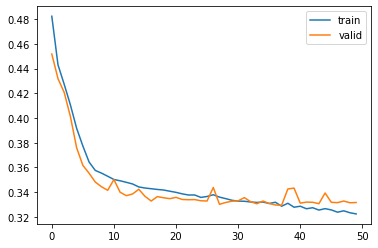

<IPython.core.display.Javascript object>

In [64]:
# Capturing learning history per epoch
hist = pd.DataFrame(history.history)
hist["epoch"] = history.epoch

# Plotting accuracy at different epochs
plt.plot(hist["loss"])
plt.plot(hist["val_loss"])
plt.legend(("train", "valid"), loc=0)

# Printing results
results = model.evaluate(X_test, y_test)

The loss-epoch curve shows slight overfitting after 35 epochs or so. This may not be an ideal model for us. However, let us verify the recall scores and see how well they track. 

First of all, let us assume the default threshold of 0.5, which is as good as a random guess, and build the confusion matrices and calculate the scores. 

Accuracy of this model is around 86% with loss reduced to 34%.

In [65]:
# predicting on the test dataset
# using default threshold of 0.5
y_pred = model.predict(X_test)
y_pred = y_pred > 0.5

63/63 [==============================] - 0s 1ms/step


<IPython.core.display.Javascript object>

63/63 [==============================] - 0s 1ms/step


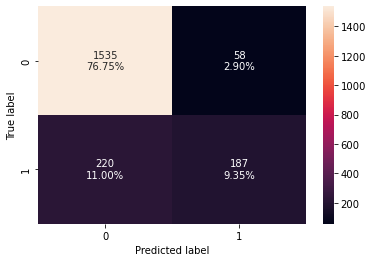

<IPython.core.display.Javascript object>

In [66]:
# plotting confusion matrix for test dataset using 0.5 as the default threshold
confusion_matrix_sklearn(model, X_test, y_test, 0.5)

The default threshold has predicted 220 customers as not likely to leave, but actually left. This is a very high number, which would mean our recall scores are poor. Let's verify that using the metrics scores.

In [67]:
# calculating the different metrics using default threshold
default_model = model_performance_classification_sklearn(
    model, X_test, y_test, 0.5
).rename(index={0: "Default Model"})
default_model

63/63 [==============================] - 0s 1ms/step


,Accuracy,Recall,Precision,F1
Default Model,0.861,0.459,0.763,0.574


<IPython.core.display.Javascript object>

As suspected the recall scores are very poor, and we cannot use this threshold for this prediction problem. 

Let's add one more column to our dataframe to indicate the quality of fitting and call it the "Loss-Epoch". When we eventually compile all the scores in the final scoring dataframe, we will have a comprehensive of the performances of the models. 

In [68]:
# adding the Loss-Epoch column to the scoring dataframe
default_model["Loss-Epoch"] = "Slightly overfitting"

# also adding the threshold value as another column
default_model["Threshold"] = 0.5

<IPython.core.display.Javascript object>

In [69]:
# concatenating the score to the consolidated score dataframe
final_score_test = pd.concat([final_score_test, default_model])
final_score_test

,Accuracy,Recall,Precision,F1,Loss-Epoch,Threshold
Default Model,0.861,0.459,0.763,0.574,Slightly overfitting,0.500


<IPython.core.display.Javascript object>

In [70]:
# Accuracy as per the classification report

cr = metrics.classification_report(y_test, y_pred)
print(cr)

              precision    recall  f1-score   support

           0       0.87      0.96      0.92      1593
           1       0.76      0.46      0.57       407

    accuracy                           0.86      2000
   macro avg       0.82      0.71      0.75      2000
weighted avg       0.85      0.86      0.85      2000



<IPython.core.display.Javascript object>

##### Observations on Model 1 using default thresholds

1. The model using 1 hidden layer and default threshold is only slightly overfitting. However, that is not the ideal threshold we will use. 

Let's find out what the ideal thresholds are using the ROC-AUC curve. 

#### Plotting ROC-AUC curve

63/63 [==============================] - 0s 1ms/step
Best Threshold=0.235670, G-Mean=0.781


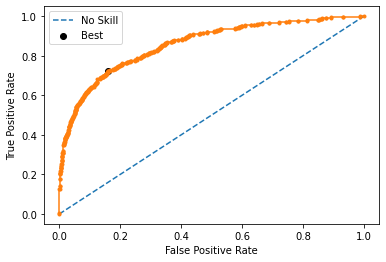

<IPython.core.display.Javascript object>

In [71]:
# predict probabilities
yhat = model.predict(X_test)
# keep probabilities for the positive outcome only
yhat = yhat[:, 0]
# calculate roc curves
fpr, tpr, thresholds = roc_curve(y_test, yhat)
# calculate the g-mean for each threshold
gmeans = np.sqrt(tpr * (1 - fpr))
# locate the index of the largest g-mean
ix = np.argmax(gmeans)
print("Best Threshold=%f, G-Mean=%.3f" % (thresholds[ix], gmeans[ix]))
# plot the roc curve for the model
pyplot.plot([0, 1], [0, 1], linestyle="--", label="No Skill")
pyplot.plot(fpr, tpr, marker=".")
pyplot.scatter(fpr[ix], tpr[ix], marker="o", color="black", label="Best")
# axis labels
pyplot.xlabel("False Positive Rate")
pyplot.ylabel("True Positive Rate")
pyplot.legend()
# show the plot
pyplot.show()

As per the ROC-AUC curve plotted by predicting the model on the test dataset, the ideal threshold is at 0.19. Let's verify the confusion matrix using this threshold. 

In [72]:
# predicting probabilities using the new threshold
y_pred = model.predict(X_test)
y_pred = y_pred > thresholds[ix]
y_pred

63/63 [==============================] - 0s 1ms/step


array([[False],
       [False],
       [False],
       ...,
       [ True],
       [False],
       [False]])

<IPython.core.display.Javascript object>

63/63 [==============================] - 0s 2ms/step


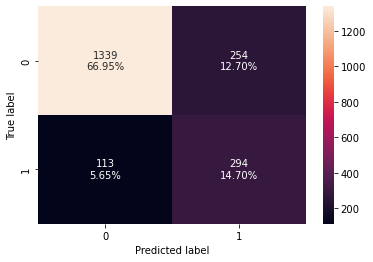

<IPython.core.display.Javascript object>

In [73]:
# plotting confusion matrix for test dataset using 0.5 as the default threshold
confusion_matrix_sklearn(model, X_test, y_test, thresholds[ix])

In [74]:
# calculating scores for the model
def_model_best_threshold = model_performance_classification_sklearn(
    model, X_test, y_test, thresholds[ix]
).rename(index={0: "Default Model"})

# adding information about fit and threshold
def_model_best_threshold["Loss-Epoch"] = "Slightly overfitting"
def_model_best_threshold["Threshold"] = thresholds[ix]

# concatenating the score to the consolidated score dataframe
final_score_test = pd.concat([final_score_test, def_model_best_threshold])
final_score_test

63/63 [==============================] - 0s 1ms/step


,Accuracy,Recall,Precision,F1,Loss-Epoch,Threshold
Default Model,0.861,0.459,0.763,0.574,Slightly overfitting,0.500
Default Model,0.817,0.722,0.536,0.616,Slightly overfitting,0.236


<IPython.core.display.Javascript object>

In [75]:
# Accuracy as per the classification report

cr = metrics.classification_report(y_test, y_pred)
print(cr)

              precision    recall  f1-score   support

           0       0.92      0.84      0.88      1593
           1       0.54      0.72      0.62       407

    accuracy                           0.82      2000
   macro avg       0.73      0.78      0.75      2000
weighted avg       0.84      0.82      0.83      2000



<IPython.core.display.Javascript object>

##### Observations on model with threshold 0.23

1. The new confusion matrix is more promising than the default model with default thresholds. 113 customers were predicted as not likely to leave, but actually left. 
2. The recall score has improved and is now 72% on the test dataset. Accuracy is 82% and F1 score is 62%. 
3. The validation dataset is slightly overfitting towards higher epochs. 

Let's see if oversampling can improve these models. 

### Model 2 - Oversampling

Let's apply oversampling by SMOTE on the dataset. 

In [76]:
backend.clear_session()
# Fixing the seed for random number generators so that we can ensure we receive the same output everytime
np.random.seed(42)
import random

random.seed(42)
tf.random.set_seed(42)

<IPython.core.display.Javascript object>

In [77]:
# applying SMOTE sampling and fitting on the dataset
smote = SMOTE(sampling_strategy="not majority")
X_sm, y_sm = smote.fit_resample(X_train, y_train)

<IPython.core.display.Javascript object>

Let's build a more advanced model with this oversampled dataset. 

1. The input layer has 128 neurons. 
2. There are three hidden layers with 64, 32 and 32 neurons respectively. 
3. The output layer has sigmoid as the activation function. 
4. All the other layers have relu activation function, with he_uniform as the weight initialization technique. 
5. We will continue to use the default learning rates, epochs = 50 and batch_size=32

In [78]:
# building the model with oversampled dataset
model_1 = Sequential()
model_1.add(
    Dense(
        activation="relu",
        input_dim=X_sm.shape[1],
        units=128,
        kernel_initializer="he_uniform",
    )
)
model_1.add(Dense(64, activation="relu", kernel_initializer="he_uniform"))
model_1.add(Dense(32, activation="relu", kernel_initializer="he_uniform"))
model_1.add(Dense(32, activation="relu", kernel_initializer="he_uniform"))
model_1.add(Dense(1, activation="sigmoid"))

<IPython.core.display.Javascript object>

In [79]:
# Create optimizer with default learning rate
# Compile the model
optimizer = tf.keras.optimizers.Adam()
model_1.compile(loss="binary_crossentropy", optimizer=optimizer, metrics=["accuracy"])

<IPython.core.display.Javascript object>

In [80]:
history_1 = model_1.fit(
    X_sm, y_sm, epochs=50, batch_size=32, verbose=1, validation_split=0.2
)

Epoch 1/50
319/319 [==============================] - 2s 3ms/step - loss: 0.5736 - accuracy: 0.6983 - val_loss: 0.6666 - val_accuracy: 0.6126
Epoch 2/50
319/319 [==============================] - 1s 2ms/step - loss: 0.4860 - accuracy: 0.7613 - val_loss: 0.9112 - val_accuracy: 0.4969
Epoch 3/50
319/319 [==============================] - 1s 3ms/step - loss: 0.4418 - accuracy: 0.7950 - val_loss: 0.5785 - val_accuracy: 0.6986
Epoch 4/50
319/319 [==============================] - 1s 2ms/step - loss: 0.4271 - accuracy: 0.8009 - val_loss: 0.6017 - val_accuracy: 0.6958
Epoch 5/50
319/319 [==============================] - 1s 2ms/step - loss: 0.4190 - accuracy: 0.8084 - val_loss: 0.6427 - val_accuracy: 0.6668
Epoch 6/50
319/319 [==============================] - 1s 2ms/step - loss: 0.4129 - accuracy: 0.8115 - val_loss: 0.5943 - val_accuracy: 0.6845
Epoch 7/50
319/319 [==============================] - 1s 2ms/step - loss: 0.4073 - accuracy: 0.8113 - val_loss: 0.6735 - val_accuracy: 0.6315
Epoch 

<IPython.core.display.Javascript object>

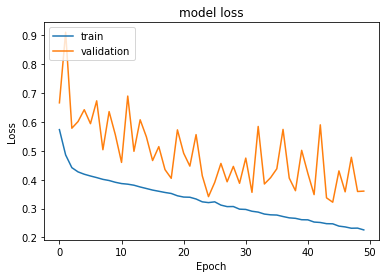

<IPython.core.display.Javascript object>

In [81]:
# Plotting Train Loss vs Validation Loss
plt.plot(history_1.history["loss"])
plt.plot(history_1.history["val_loss"])
plt.title("model loss")
plt.ylabel("Loss")
plt.xlabel("Epoch")
plt.legend(["train", "validation"], loc="upper left")
plt.show()

We see that the loss is decreasing with each epoch, but unfortunately the validation dataset is heavily overfitting. We can try to improve this model by applying dropout or batch normalization techniques.

63/63 [==============================] - 0s 1ms/step
Best Threshold=0.219107, G-Mean=0.737


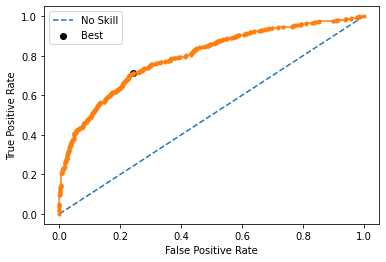

<IPython.core.display.Javascript object>

In [82]:
# predict probabilities
yhat1 = model_1.predict(X_test)
# keep probabilities for the positive outcome only
yhat1 = yhat1[:, 0]
# calculate roc curves
fpr, tpr, thresholds1 = roc_curve(y_test, yhat1)
# calculate the g-mean for each threshold
gmeans1 = np.sqrt(tpr * (1 - fpr))
# locate the index of the largest g-mean
ix = np.argmax(gmeans1)
print("Best Threshold=%f, G-Mean=%.3f" % (thresholds1[ix], gmeans1[ix]))
# plot the roc curve for the model
pyplot.plot([0, 1], [0, 1], linestyle="--", label="No Skill")
pyplot.plot(fpr, tpr, marker=".")
pyplot.scatter(fpr[ix], tpr[ix], marker="o", color="black", label="Best")
# axis labels
pyplot.xlabel("False Positive Rate")
pyplot.ylabel("True Positive Rate")
pyplot.legend()
# show the plot
pyplot.show()

In [83]:
y_pred_e1 = model_1.predict(X_test)
y_pred_e1 = y_pred_e1 > thresholds1[ix]
y_pred_e1

63/63 [==============================] - 0s 2ms/step


array([[False],
       [False],
       [False],
       ...,
       [ True],
       [False],
       [False]])

<IPython.core.display.Javascript object>

63/63 [==============================] - 0s 2ms/step


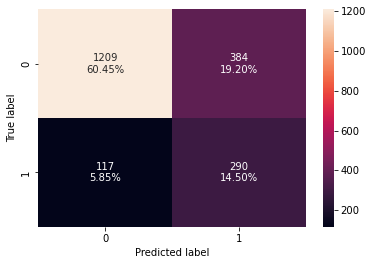

<IPython.core.display.Javascript object>

In [84]:
# plotting confusion matrix for test dataset
confusion_matrix_sklearn(model_1, X_test, y_test, thresholds1[ix])

In [85]:
# Accuracy as per the classification report
cr1 = metrics.classification_report(y_test, y_pred_e1)
print(cr1)

              precision    recall  f1-score   support

           0       0.91      0.76      0.83      1593
           1       0.43      0.71      0.54       407

    accuracy                           0.75      2000
   macro avg       0.67      0.74      0.68      2000
weighted avg       0.81      0.75      0.77      2000



<IPython.core.display.Javascript object>

In [86]:
# calculating scores for the model
oversampled_model = model_performance_classification_sklearn(
    model_1, X_test, y_test, thresholds1[ix]
).rename(index={0: "OverSampled Model"})

# adding information about fit and threshold
oversampled_model["Loss-Epoch"] = "Overfit"
oversampled_model["Threshold"] = thresholds1[ix]

# concatenating the score to the consolidated score dataframe
final_score_test = pd.concat([final_score_test, oversampled_model])
final_score_test

63/63 [==============================] - 0s 1ms/step


,Accuracy,Recall,Precision,F1,Loss-Epoch,Threshold
Default Model,0.861,0.459,0.763,0.574,Slightly overfitting,0.500
Default Model,0.817,0.722,0.536,0.616,Slightly overfitting,0.236
OverSampled Model,0.750,0.713,0.430,0.537,Overfit,0.219


<IPython.core.display.Javascript object>

##### Observations on the oversampled dataset model
1. The loss decreases with training on 50 epochs. 
2. However, the validation dataset is overfitting. 
3. All three scores of interest have fallen considerably with respect to our previous model. 
4. As per this model 117 customers were predicted as not likely to leave the bank, but had actually left. 

### Model 3 - Dropout on oversampled model

We will apply dropout techniques on the oversampled models to prevent the overfitting on the performance.

In [87]:
backend.clear_session()
# Fixing the seed for random number generators so that we can ensure we receive the same output everytime
np.random.seed(42)
import random

random.seed(42)
tf.random.set_seed(42)

<IPython.core.display.Javascript object>

In this model, we will use the same model as the oversampled model we built previously. However, we will add a dropout layer with 20% rate for each hidden layer. 

Learning rates, epochs and batch size will continue to be the same. 

In [88]:
# building the model with oversampled dataset
model_2 = Sequential()
model_2.add(
    Dense(
        activation="relu",
        input_dim=X_sm.shape[1],
        units=128,
        kernel_initializer="he_uniform",
    )
)
model_2.add(Dense(64, activation="relu", kernel_initializer="he_uniform"))
model_2.add(Dropout(0.2))
model_2.add(Dense(32, activation="relu", kernel_initializer="he_uniform"))
model_2.add(Dropout(0.2))
model_2.add(Dense(32, activation="relu", kernel_initializer="he_uniform"))
model_2.add(Dropout(0.2))
model_2.add(Dense(1, activation="sigmoid"))

<IPython.core.display.Javascript object>

In [89]:
# Create optimizer with default learning rate
# Compile the model
optimizer = tf.keras.optimizers.Adam()
model_2.compile(loss="binary_crossentropy", optimizer=optimizer, metrics=["accuracy"])

<IPython.core.display.Javascript object>

In [90]:
history_2 = model_2.fit(
    X_sm, y_sm, epochs=50, batch_size=32, verbose=1, validation_split=0.2
)

Epoch 1/50
319/319 [==============================] - 2s 3ms/step - loss: 0.6250 - accuracy: 0.6545 - val_loss: 0.6884 - val_accuracy: 0.6060
Epoch 2/50
319/319 [==============================] - 1s 3ms/step - loss: 0.5691 - accuracy: 0.7147 - val_loss: 0.7884 - val_accuracy: 0.4651
Epoch 3/50
319/319 [==============================] - 1s 3ms/step - loss: 0.5400 - accuracy: 0.7305 - val_loss: 0.7124 - val_accuracy: 0.5706
Epoch 4/50
319/319 [==============================] - 1s 3ms/step - loss: 0.4979 - accuracy: 0.7646 - val_loss: 0.7379 - val_accuracy: 0.5879
Epoch 5/50
319/319 [==============================] - 1s 3ms/step - loss: 0.4717 - accuracy: 0.7759 - val_loss: 0.6588 - val_accuracy: 0.6099
Epoch 6/50
319/319 [==============================] - 1s 3ms/step - loss: 0.4633 - accuracy: 0.7811 - val_loss: 0.6148 - val_accuracy: 0.6354
Epoch 7/50
319/319 [==============================] - 1s 3ms/step - loss: 0.4490 - accuracy: 0.7916 - val_loss: 0.6804 - val_accuracy: 0.6122
Epoch 

<IPython.core.display.Javascript object>

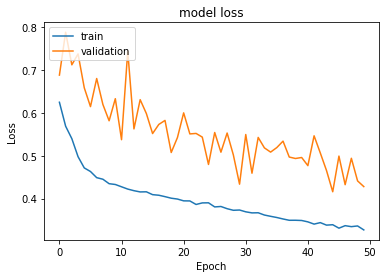

<IPython.core.display.Javascript object>

In [91]:
# Plotting Train Loss vs Validation Loss
plt.plot(history_2.history["loss"])
plt.plot(history_2.history["val_loss"])
plt.title("model loss")
plt.ylabel("Loss")
plt.xlabel("Epoch")
plt.legend(["train", "validation"], loc="upper left")
plt.show()

Applying the dropout has also not improved our model. Given that observation, we may have to discard this model. But let's first verify the confusion matrix and the scores.

63/63 [==============================] - 0s 1ms/step
Best Threshold=0.459664, G-Mean=0.749


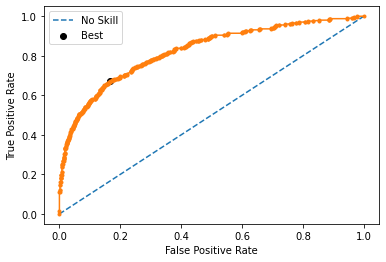

<IPython.core.display.Javascript object>

In [92]:
# predict probabilities
yhat2 = model_2.predict(X_test)
# keep probabilities for the positive outcome only
yhat2 = yhat2[:, 0]
# calculate roc curves
fpr, tpr, thresholds2 = roc_curve(y_test, yhat2)
# calculate the g-mean for each threshold
gmeans2 = np.sqrt(tpr * (1 - fpr))
# locate the index of the largest g-mean
ix = np.argmax(gmeans2)
print("Best Threshold=%f, G-Mean=%.3f" % (thresholds2[ix], gmeans2[ix]))
# plot the roc curve for the model
pyplot.plot([0, 1], [0, 1], linestyle="--", label="No Skill")
pyplot.plot(fpr, tpr, marker=".")
pyplot.scatter(fpr[ix], tpr[ix], marker="o", color="black", label="Best")
# axis labels
pyplot.xlabel("False Positive Rate")
pyplot.ylabel("True Positive Rate")
pyplot.legend()
# show the plot
pyplot.show()

In [93]:
# calculating scores for the model
dropout_oversampled_model = model_performance_classification_sklearn(
    model_2, X_test, y_test, thresholds2[ix]
).rename(index={0: "OverSampled Model with Dropout"})

# adding information about fit and threshold
dropout_oversampled_model["Loss-Epoch"] = "Overfit"
dropout_oversampled_model["Threshold"] = thresholds2[ix]

# concatenating the score to the consolidated score dataframe
final_score_test = pd.concat([final_score_test, dropout_oversampled_model])
final_score_test

63/63 [==============================] - 0s 1ms/step


,Accuracy,Recall,Precision,F1,Loss-Epoch,Threshold
Default Model,0.861,0.459,0.763,0.574,Slightly overfitting,0.500
Default Model,0.817,0.722,0.536,0.616,Slightly overfitting,0.236
OverSampled Model,0.750,0.713,0.430,0.537,Overfit,0.219
OverSampled Model with Dropout,0.799,0.671,0.506,0.577,Overfit,0.460


<IPython.core.display.Javascript object>

In [94]:
y_pred_e2 = model_2.predict(X_test)
y_pred_e2 = y_pred_e2 > thresholds2[ix]
y_pred_e2

63/63 [==============================] - 0s 1ms/step


array([[False],
       [False],
       [False],
       ...,
       [ True],
       [False],
       [False]])

<IPython.core.display.Javascript object>

63/63 [==============================] - 0s 2ms/step


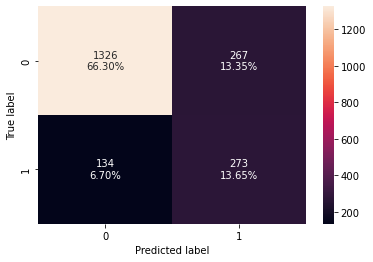

<IPython.core.display.Javascript object>

In [95]:
# plotting confusion matrix for test dataset
confusion_matrix_sklearn(model_2, X_test, y_test, thresholds2[ix])

In [96]:
# Accuracy as per the classification report
cr2 = metrics.classification_report(y_test, y_pred_e2)
print(cr2)

              precision    recall  f1-score   support

           0       0.91      0.83      0.87      1593
           1       0.51      0.67      0.58       407

    accuracy                           0.80      2000
   macro avg       0.71      0.75      0.72      2000
weighted avg       0.83      0.80      0.81      2000



<IPython.core.display.Javascript object>

##### Observations from the oversampled model with dropout

1. This model was heavily overfitting on the validation dataset, even though the loss seemed to be reducing. 
2. With the best thresholds identified for this model, the three scores of interest have considerably fallen. 
3. False negative counts have increased in this model when compared to the previous model, thereby reducing the recall score. 
4. Overall this model does not look very promising, but we will continue with model building to see if we can build better models. 

### Model 4 - Keras Tuner Random Search Model

So far, we have been building models using random picks of layers and neurons. Let's use Keras Tuner to do a Random Search and define for us what the hyperparameters are. 

**Hyperparameters**
* How many hidden layers should the model have?
* How many neurons should the model have in each hidden layer?
* Learning Rate

We will use the original X_train and X_test datasets here instead of the oversampled datasets.

In [97]:
backend.clear_session()
# Fixing the seed for random number generators so that we can ensure we receive the same output everytime
np.random.seed(42)
import random

random.seed(42)
tf.random.set_seed(42)

<IPython.core.display.Javascript object>

In [98]:
def build_model(h):
    model = keras.Sequential()
    for i in range(h.Int("num_layers", 2, 10)):
        model.add(
            layers.Dense(
                units=h.Int("units_" + str(i), min_value=32, max_value=256, step=32),
                activation="relu",
            )
        )
    model.add(layers.Dense(1, activation="sigmoid"))
    model.compile(
        optimizer=keras.optimizers.Adam(h.Choice("learning_rate", [1e-2, 1e-3, 1e-4])),
        loss="binary_crossentropy",
        metrics=["accuracy"],
    )
    return model

<IPython.core.display.Javascript object>

Initialize a RandomSearch tuner and specify the objective to select the best models. We use max_trials to specify the number of different models to try.

In [99]:
tuner = RandomSearch(
    build_model,
    objective="val_accuracy",
    max_trials=10,
    executions_per_trial=3,
    project_name="Job_",
)

INFO:tensorflow:Reloading Tuner from .\Job_\tuner0.json


<IPython.core.display.Javascript object>

In [100]:
tuner.search_space_summary()

Search space summary
Default search space size: 12
num_layers (Int)
{'default': None, 'conditions': [], 'min_value': 2, 'max_value': 10, 'step': 1, 'sampling': 'linear'}
units_0 (Int)
{'default': None, 'conditions': [], 'min_value': 32, 'max_value': 256, 'step': 32, 'sampling': 'linear'}
units_1 (Int)
{'default': None, 'conditions': [], 'min_value': 32, 'max_value': 256, 'step': 32, 'sampling': 'linear'}
learning_rate (Choice)
{'default': 0.01, 'conditions': [], 'values': [0.01, 0.001, 0.0001], 'ordered': True}
units_2 (Int)
{'default': None, 'conditions': [], 'min_value': 32, 'max_value': 256, 'step': 32, 'sampling': 'linear'}
units_3 (Int)
{'default': None, 'conditions': [], 'min_value': 32, 'max_value': 256, 'step': 32, 'sampling': 'linear'}
units_4 (Int)
{'default': None, 'conditions': [], 'min_value': 32, 'max_value': 256, 'step': 32, 'sampling': 'linear'}
units_5 (Int)
{'default': None, 'conditions': [], 'min_value': 32, 'max_value': 256, 'step': 32, 'sampling': 'linear'}
units_6

<IPython.core.display.Javascript object>

In [101]:
# Searching the best model on X and y train
tuner.search(X_train, y_train, epochs=5, validation_split=0.2)

INFO:tensorflow:Oracle triggered exit


<IPython.core.display.Javascript object>

In [102]:
## Printing the best model with their hyperparameters
tuner.results_summary(1)

Results summary
Results in .\Job_
Showing 1 best trials
Objective(name="val_accuracy", direction="max")

Trial 2 summary
Hyperparameters:
num_layers: 9
units_0: 192
units_1: 64
learning_rate: 0.001
units_2: 160
units_3: 32
units_4: 224
units_5: 32
units_6: 256
units_7: 96
units_8: 192
Score: 0.8727083404858907


<IPython.core.display.Javascript object>

It seems the best model has 9 layers and a learning rate of 0.001 - which is our default learning rate. 

Let's build the model using the best parameters we found using the Keras Tuner.

In [103]:
backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

<IPython.core.display.Javascript object>

In [104]:
model_3 = Sequential()
model_3.add(
    Dense(
        192,
        activation="relu",
        kernel_initializer="he_uniform",
        input_dim=X_train.shape[1],
    )
)
model_3.add(Dense(64, activation="relu", kernel_initializer="he_uniform"))
model_3.add(Dense(160, activation="relu", kernel_initializer="he_uniform"))
model_3.add(Dense(32, activation="relu", kernel_initializer="he_uniform"))
model_3.add(Dense(224, activation="relu", kernel_initializer="he_uniform"))
model_3.add(Dense(32, activation="relu", kernel_initializer="he_uniform"))
model_3.add(Dense(256, activation="relu", kernel_initializer="he_uniform"))
model_3.add(Dense(96, activation="relu", kernel_initializer="he_uniform"))
model_3.add(Dense(192, activation="relu", kernel_initializer="he_uniform"))
model_3.add(Dense(1, activation="sigmoid"))

<IPython.core.display.Javascript object>

In [105]:
model_3.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 192)               2688      
                                                                 
 dense_1 (Dense)             (None, 64)                12352     
                                                                 
 dense_2 (Dense)             (None, 160)               10400     
                                                                 
 dense_3 (Dense)             (None, 32)                5152      
                                                                 
 dense_4 (Dense)             (None, 224)               7392      
                                                                 
 dense_5 (Dense)             (None, 32)                7200      
                                                                 
 dense_6 (Dense)             (None, 256)               8

<IPython.core.display.Javascript object>

In [106]:
optimizer = tf.keras.optimizers.Adam(0.001)
model_3.compile(loss="binary_crossentropy", optimizer=optimizer, metrics=["accuracy"])

<IPython.core.display.Javascript object>

In [107]:
history_3 = model_3.fit(
    X_train, y_train, batch_size=32, epochs=50, verbose=1, validation_split=0.2
)

Epoch 1/50
200/200 [==============================] - 2s 5ms/step - loss: 0.4764 - accuracy: 0.7939 - val_loss: 0.4388 - val_accuracy: 0.8087
Epoch 2/50
200/200 [==============================] - 1s 4ms/step - loss: 0.4151 - accuracy: 0.8270 - val_loss: 0.3758 - val_accuracy: 0.8381
Epoch 3/50
200/200 [==============================] - 1s 3ms/step - loss: 0.3870 - accuracy: 0.8363 - val_loss: 0.3643 - val_accuracy: 0.8575
Epoch 4/50
200/200 [==============================] - 1s 4ms/step - loss: 0.3743 - accuracy: 0.8464 - val_loss: 0.3870 - val_accuracy: 0.8512
Epoch 5/50
200/200 [==============================] - 1s 4ms/step - loss: 0.3708 - accuracy: 0.8487 - val_loss: 0.3428 - val_accuracy: 0.8562
Epoch 6/50
200/200 [==============================] - 1s 4ms/step - loss: 0.3555 - accuracy: 0.8545 - val_loss: 0.3663 - val_accuracy: 0.8487
Epoch 7/50
200/200 [==============================] - 1s 3ms/step - loss: 0.3522 - accuracy: 0.8531 - val_loss: 0.3514 - val_accuracy: 0.8606
Epoch 

<IPython.core.display.Javascript object>

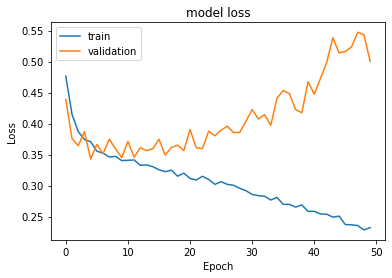

<IPython.core.display.Javascript object>

In [108]:
# Plotting Train Loss vs Validation Loss
plt.plot(history_3.history["loss"])
plt.plot(history_3.history["val_loss"])
plt.title("model loss")
plt.ylabel("Loss")
plt.xlabel("Epoch")
plt.legend(["train", "validation"], loc="upper left")
plt.show()

Evidently, this model began promisingly, with losses decreasing. However as epochs increased, the model began to be overfitting and the loss on the validation dataset increased largely. 

63/63 [==============================] - 0s 2ms/step
Best Threshold=0.271963, G-Mean=0.738


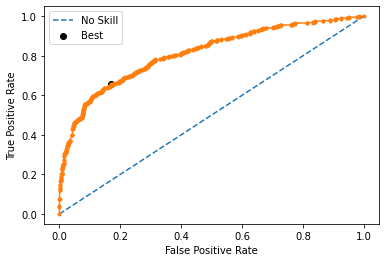

<IPython.core.display.Javascript object>

In [109]:
# predict probabilities
yhat3 = model_3.predict(X_test)
# keep probabilities for the positive outcome only
yhat3 = yhat3[:, 0]
# calculate roc curves
fpr, tpr, thresholds3 = roc_curve(y_test, yhat3)
# calculate the g-mean for each threshold
gmeans3 = np.sqrt(tpr * (1 - fpr))
# locate the index of the largest g-mean
ix = np.argmax(gmeans3)
print("Best Threshold=%f, G-Mean=%.3f" % (thresholds3[ix], gmeans3[ix]))
# plot the roc curve for the model
pyplot.plot([0, 1], [0, 1], linestyle="--", label="No Skill")
pyplot.plot(fpr, tpr, marker=".")
pyplot.scatter(fpr[ix], tpr[ix], marker="o", color="black", label="Best")
# axis labels
pyplot.xlabel("False Positive Rate")
pyplot.ylabel("True Positive Rate")
pyplot.legend()
# show the plot
pyplot.show()

In [110]:
y_pred_e3 = model_3.predict(X_test)
y_pred_e3 = y_pred_e3 > thresholds3[ix]
y_pred_e3

63/63 [==============================] - 0s 2ms/step


array([[False],
       [False],
       [False],
       ...,
       [ True],
       [False],
       [False]])

<IPython.core.display.Javascript object>

In [111]:
# calculating scores for the model
keras_tuned_model = model_performance_classification_sklearn(
    model_3, X_test, y_test, thresholds3[ix]
).rename(index={0: "Keras Tuned"})

# adding information about fit and threshold
keras_tuned_model["Loss-Epoch"] = "Overfit"
keras_tuned_model["Threshold"] = thresholds3[ix]

# concatenating the score to the consolidated score dataframe
final_score_test = pd.concat([final_score_test, keras_tuned_model])
final_score_test

63/63 [==============================] - 0s 2ms/step


,Accuracy,Recall,Precision,F1,Loss-Epoch,Threshold
Default Model,0.861,0.459,0.763,0.574,Slightly overfitting,0.500
Default Model,0.817,0.722,0.536,0.616,Slightly overfitting,0.236
OverSampled Model,0.750,0.713,0.430,0.537,Overfit,0.219
OverSampled Model with Dropout,0.799,0.671,0.506,0.577,Overfit,0.460
Keras Tuned,0.794,0.654,0.496,0.564,Overfit,0.272


<IPython.core.display.Javascript object>

63/63 [==============================] - 0s 2ms/step


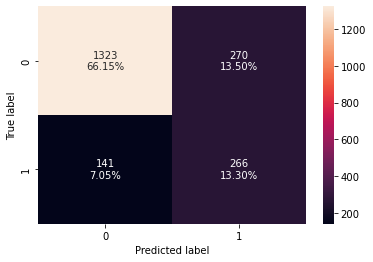

<IPython.core.display.Javascript object>

In [112]:
# plotting confusion matrix for test dataset
confusion_matrix_sklearn(model_3, X_test, y_test, thresholds3[ix])

##### Observations on the Keras Tuned model

1. Even though the Random Search Keras Tuner model returned an accuracy of 87% in the search, the resultant model was hugely overfitting as the training continued in higher epochs. 
2. The recall score is 65%, F1-score is 57% and accuracy is 80% on the test dataset. 
3. With the best thresholds, the model predicted that 141 customers likely to not leave the bank but actually did. 
4. This may not be an ideal model for us to pursue, let's continue to build models that will give us good results.

### Model 5 - Dropout Models

In this model, let us use the original X_train and X_test datasets and our basic model. Our basic model had only 3 layers. 

- The layers have 64, 32 and 1 neurons respectively. 
- All the layers will use relu activation, except for the output layer which will use sigmoid activation. 
- "he_uniform" weight initialization will be used on all layers using relu activation.
- The original model showed signs of overfitting so we will use dropout to cure that. 
- Dropout rate of 0.5 will be applied on the hidden layer only, as they are some of the ideal rates to apply on hidden layers. 

In [113]:
backend.clear_session()
# Fixing the seed for random number generators so that we can ensure we receive the same output everytime
np.random.seed(42)
import random

random.seed(42)
tf.random.set_seed(42)

<IPython.core.display.Javascript object>

In [114]:
# Initializing the ANN
model_4 = Sequential()
model_4.add(
    Dense(
        activation="relu",
        input_dim=X_train.shape[1],
        units=64,
        kernel_initializer="he_uniform",
    )
)
model_4.add(Dense(32, activation="relu", kernel_initializer="he_uniform"))
model_4.add(Dropout(0.5))
model_4.add(Dense(1, activation="sigmoid"))

<IPython.core.display.Javascript object>

In [115]:
optimizer = tf.keras.optimizers.Adam(0.001)
model_4.compile(loss="binary_crossentropy", optimizer=optimizer, metrics=["accuracy"])

<IPython.core.display.Javascript object>

In [116]:
history_4 = model_4.fit(
    X_train, y_train, batch_size=32, epochs=50, verbose=1, validation_split=0.2,
)

Epoch 1/50
200/200 [==============================] - 1s 3ms/step - loss: 0.5246 - accuracy: 0.7745 - val_loss: 0.4608 - val_accuracy: 0.7987
Epoch 2/50
200/200 [==============================] - 0s 2ms/step - loss: 0.4771 - accuracy: 0.7948 - val_loss: 0.4519 - val_accuracy: 0.8050
Epoch 3/50
200/200 [==============================] - 0s 2ms/step - loss: 0.4598 - accuracy: 0.8000 - val_loss: 0.4369 - val_accuracy: 0.8075
Epoch 4/50
200/200 [==============================] - 0s 2ms/step - loss: 0.4490 - accuracy: 0.8066 - val_loss: 0.4321 - val_accuracy: 0.8150
Epoch 5/50
200/200 [==============================] - 0s 2ms/step - loss: 0.4375 - accuracy: 0.8041 - val_loss: 0.4243 - val_accuracy: 0.8263
Epoch 6/50
200/200 [==============================] - 0s 2ms/step - loss: 0.4295 - accuracy: 0.8134 - val_loss: 0.4128 - val_accuracy: 0.8306
Epoch 7/50
200/200 [==============================] - 0s 2ms/step - loss: 0.4146 - accuracy: 0.8192 - val_loss: 0.4028 - val_accuracy: 0.8438
Epoch 

<IPython.core.display.Javascript object>

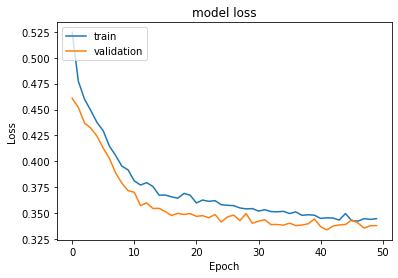

<IPython.core.display.Javascript object>

In [117]:
# Plotting Train Loss vs Validation Loss
plt.plot(history_4.history["loss"])
plt.plot(history_4.history["val_loss"])
plt.title("model loss")
plt.ylabel("Loss")
plt.xlabel("Epoch")
plt.legend(["train", "validation"], loc="upper left")
plt.show()

63/63 [==============================] - 0s 1ms/step
Best Threshold=0.185952, G-Mean=0.781


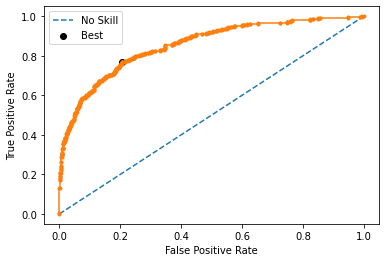

<IPython.core.display.Javascript object>

In [118]:
# predict probabilities
yhat4 = model_4.predict(X_test)
# keep probabilities for the positive outcome only
yhat4 = yhat4[:, 0]
# calculate roc curves
fpr, tpr, thresholds4 = roc_curve(y_test, yhat4)
# calculate the g-mean for each threshold
gmeans4 = np.sqrt(tpr * (1 - fpr))
# locate the index of the largest g-mean
ix = np.argmax(gmeans4)
print("Best Threshold=%f, G-Mean=%.3f" % (thresholds4[ix], gmeans4[ix]))
# plot the roc curve for the model
pyplot.plot([0, 1], [0, 1], linestyle="--", label="No Skill")
pyplot.plot(fpr, tpr, marker=".")
pyplot.scatter(fpr[ix], tpr[ix], marker="o", color="black", label="Best")
# axis labels
pyplot.xlabel("False Positive Rate")
pyplot.ylabel("True Positive Rate")
pyplot.legend()
# show the plot
pyplot.show()

In [119]:
y_pred_e4 = model_4.predict(X_test)
y_pred_e4 = y_pred_e4 > thresholds4[ix]
y_pred_e4

63/63 [==============================] - 0s 1ms/step


array([[False],
       [False],
       [False],
       ...,
       [ True],
       [False],
       [False]])

<IPython.core.display.Javascript object>

In [120]:
# calculating scores for the model
dropout_model = model_performance_classification_sklearn(
    model_4, X_test, y_test, thresholds4[ix]
).rename(index={0: "Model with Dropout"})

# adding information about fit and threshold
dropout_model["Loss-Epoch"] = "Good Fit"
dropout_model["Threshold"] = thresholds4[ix]

# concatenating the score to the consolidated score dataframe
final_score_test = pd.concat([final_score_test, dropout_model])
final_score_test

63/63 [==============================] - 0s 1ms/step


,Accuracy,Recall,Precision,F1,Loss-Epoch,Threshold
Default Model,0.861,0.459,0.763,0.574,Slightly overfitting,0.500
Default Model,0.817,0.722,0.536,0.616,Slightly overfitting,0.236
OverSampled Model,0.750,0.713,0.430,0.537,Overfit,0.219
OverSampled Model with Dropout,0.799,0.671,0.506,0.577,Overfit,0.460
Keras Tuned,0.794,0.654,0.496,0.564,Overfit,0.272
Model with Dropout,0.788,0.767,0.487,0.595,Good Fit,0.186


<IPython.core.display.Javascript object>

63/63 [==============================] - 0s 2ms/step


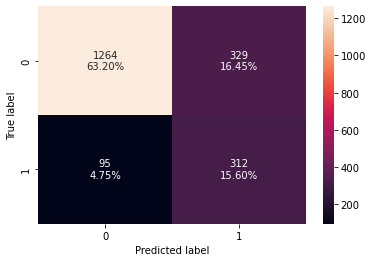

<IPython.core.display.Javascript object>

In [121]:
# plotting confusion matrix for test dataset
confusion_matrix_sklearn(model_4, X_test, y_test, thresholds4[ix])

In [122]:
# Accuracy as per the classification report
cr4 = metrics.classification_report(y_test, y_pred_e4)
print(cr4)

              precision    recall  f1-score   support

           0       0.93      0.79      0.86      1593
           1       0.49      0.77      0.60       407

    accuracy                           0.79      2000
   macro avg       0.71      0.78      0.73      2000
weighted avg       0.84      0.79      0.80      2000



<IPython.core.display.Javascript object>

##### Observations on the model with dropout

1. According to this model, out of all the customers predicted as not leaving the bank, 95 customers were predicted as not leaving but actually left. 
2. The recall score on the test dataset is 77%, accuracy is 78% and f1 score is 60% - all of which are excellent metrics. 
3. There is a good fit in this model and the training and validation curves are smooth. Loss is reduced as training continues in higher epochs. 

### Model 6 - Batch Normalized Model

Looks like a simple network is the solution for us, since none of the models with more than 3 layers gave us good performances, either in loss reduction or good recall scores. 

Let us therefore continue to use the basic model and apply batch normalization to it and see whether it can better correct the overfitting and give us good classification scores. 

In [123]:
backend.clear_session()
# Fixing the seed for random number generators so that we can ensure we receive the same output everytime
np.random.seed(42)
import random

random.seed(42)
tf.random.set_seed(42)

<IPython.core.display.Javascript object>

In [124]:
model_5 = Sequential()
model_5.add(
    Dense(
        activation="relu",
        input_dim=X_train.shape[1],
        units=64,
        kernel_initializer="he_uniform",
    )
)
model_5.add(Dense(32, activation="relu", kernel_initializer="he_uniform"))
model_5.add(BatchNormalization())
model_5.add(Dense(1, activation="sigmoid"))

<IPython.core.display.Javascript object>

In [125]:
optimizer = tf.keras.optimizers.Adam(0.01)
model_5.compile(loss="binary_crossentropy", optimizer=optimizer, metrics=["accuracy"])

<IPython.core.display.Javascript object>

In [126]:
history_5 = model_5.fit(
    X_train, y_train, batch_size=32, epochs=50, verbose=1, validation_split=0.2
)

Epoch 1/50
200/200 [==============================] - 2s 4ms/step - loss: 0.4652 - accuracy: 0.7931 - val_loss: 0.4711 - val_accuracy: 0.8156
Epoch 2/50
200/200 [==============================] - 1s 3ms/step - loss: 0.4107 - accuracy: 0.8245 - val_loss: 0.3827 - val_accuracy: 0.8331
Epoch 3/50
200/200 [==============================] - 1s 3ms/step - loss: 0.3890 - accuracy: 0.8309 - val_loss: 0.3954 - val_accuracy: 0.8319
Epoch 4/50
200/200 [==============================] - 1s 3ms/step - loss: 0.3782 - accuracy: 0.8411 - val_loss: 0.3858 - val_accuracy: 0.8119
Epoch 5/50
200/200 [==============================] - 1s 3ms/step - loss: 0.3658 - accuracy: 0.8480 - val_loss: 0.3699 - val_accuracy: 0.8300
Epoch 6/50
200/200 [==============================] - 1s 3ms/step - loss: 0.3631 - accuracy: 0.8497 - val_loss: 0.3758 - val_accuracy: 0.8356
Epoch 7/50
200/200 [==============================] - 1s 3ms/step - loss: 0.3625 - accuracy: 0.8480 - val_loss: 0.3324 - val_accuracy: 0.8662
Epoch 

<IPython.core.display.Javascript object>

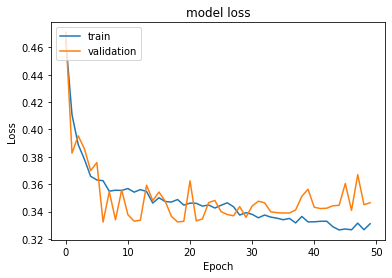

<IPython.core.display.Javascript object>

In [127]:
# Plotting Train Loss vs Validation Loss
plt.plot(history_5.history["loss"])
plt.plot(history_5.history["val_loss"])
plt.title("model loss")
plt.ylabel("Loss")
plt.xlabel("Epoch")
plt.legend(["train", "validation"], loc="upper left")
plt.show()

This model is highly noisy and tending to overfit in the higher epochs. Let's verify the classification scores and confusion matrix.

63/63 [==============================] - 0s 1ms/step
Best Threshold=0.182604, G-Mean=0.763


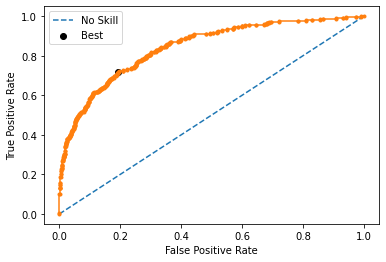

<IPython.core.display.Javascript object>

In [128]:
# predict probabilities
yhat5 = model_5.predict(X_test)
# keep probabilities for the positive outcome only
yhat5 = yhat5[:, 0]
# calculate roc curves
fpr, tpr, thresholds5 = roc_curve(y_test, yhat5)
# calculate the g-mean for each threshold
gmeans5 = np.sqrt(tpr * (1 - fpr))
# locate the index of the largest g-mean
ix = np.argmax(gmeans5)
print("Best Threshold=%f, G-Mean=%.3f" % (thresholds5[ix], gmeans5[ix]))
# plot the roc curve for the model
pyplot.plot([0, 1], [0, 1], linestyle="--", label="No Skill")
pyplot.plot(fpr, tpr, marker=".")
pyplot.scatter(fpr[ix], tpr[ix], marker="o", color="black", label="Best")
# axis labels
pyplot.xlabel("False Positive Rate")
pyplot.ylabel("True Positive Rate")
pyplot.legend()
# show the plot
pyplot.show()

In [129]:
y_pred_e5 = model_5.predict(X_test)
y_pred_e5 = y_pred_e5 > thresholds5[ix]
y_pred_e5

63/63 [==============================] - 0s 1ms/step


array([[False],
       [False],
       [False],
       ...,
       [ True],
       [False],
       [False]])

<IPython.core.display.Javascript object>

63/63 [==============================] - 0s 1ms/step


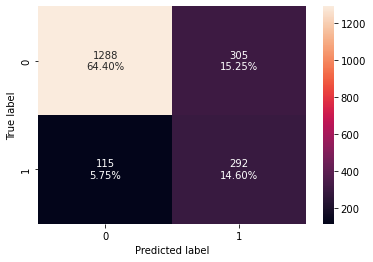

<IPython.core.display.Javascript object>

In [130]:
# plotting confusion matrix for test dataset
confusion_matrix_sklearn(model_5, X_test, y_test, thresholds5[ix])

In [131]:
# calculating scores for the model
batchnorm_model = model_performance_classification_sklearn(
    model_5, X_test, y_test, thresholds5[ix]
).rename(index={0: "BatchNorm Model"})

# adding information about fit and threshold
batchnorm_model["Loss-Epoch"] = "Tending to overfit with some noise"
batchnorm_model["Threshold"] = thresholds5[ix]

# concatenating the score to the consolidated score dataframe
final_score_test = pd.concat([final_score_test, batchnorm_model])
final_score_test

63/63 [==============================] - 0s 2ms/step


,Accuracy,Recall,Precision,F1,Loss-Epoch,Threshold
Default Model,0.861,0.459,0.763,0.574,Slightly overfitting,0.500
Default Model,0.817,0.722,0.536,0.616,Slightly overfitting,0.236
OverSampled Model,0.750,0.713,0.430,0.537,Overfit,0.219
OverSampled Model with Dropout,0.799,0.671,0.506,0.577,Overfit,0.460
Keras Tuned,0.794,0.654,0.496,0.564,Overfit,0.272
Model with Dropout,0.788,0.767,0.487,0.595,Good Fit,0.186
BatchNorm Model,0.790,0.717,0.489,0.582,Tending to overfit with some noise,0.183


<IPython.core.display.Javascript object>

##### Observations on batch normalized model:
According to this model:
1. On the test dataset, Recall is 71%, accuracy is 80% and F1 score is 58% - which are all good. 
2. Only 115 customers were predicted as likely to not leave the bank, but actually did. 

Even though the metrics are great, the model tends to produce noise and is overfitting. This may not be the best model to recommend to the business on that regard. 

## Summary and Conclusions

### Summary of Data

- There were 10000 rows and 14 columns originally in the dataset.
- There were no null values in any of the columns.
- The dataset is imbalanced, with 80% customers who have not left the bank and only 20% leaving the bank.
- There does not seem to be any duplicated rows in the dataset.
- Outliers were detected in CreditScore and Age columns.
- There were zero values detected in Balance column, but these were retained as valid values. 
- There were two object type columns- Geography and Gender. The rest of the columns were numerical in nature. 

### Summary of Data Treatments

1. There were no missing values, or duplicated rows in the dataset. 
2. Outliers were detected in CreditScore and Age columns, but they were retained as it is given since they were not found to be invalid considering the domain. 
3. There were zero values detected in Balance column, but these were retained as valid values.
4. The columns "RowNumber", "CustomerId" and "Surname" were dropped as they were not relevant for data analysis or modelling. 

### Key Observations from EDA

1. The features CreditScore, Balance, EstimatedSalary and Tenure did not have any strong influence on the target variable 'Exited'. 
2. However, the median age of customers who exited the bank is higher than the customers who did not leave (45 years compared to 35 years). 
3. The count of male customers are slightly higher than female customers, 5457 against 4543. However, more female customers tend to exit the bank than male customers.
4. Most customers are from France. German and Spanish customers are almost equal in number. 
5. Even though most customers are France, it is surprising to note than customers who exit are mostly from Germany. 
6. Most of the customers hold only 1 or 2 products. Only very few customers hold 3 or more products.
7. However, even though only very few customers hold 3 or more products, most of the customers who exit the bank come from these categories. Customers holding 2 products seem less likely to leave the bank. 
8. Having a credit card does not seem to have an influence on customers exiting the bank.
9. Most customers hold tenure between 1-9 years. Very few customers hold shorter tenure than 1 year or greater tenure than 9 years.
10. More than half of the dataset are active customers, engaging frequently with the bank. Customers who are not active with the bank are more likely to leave the bank.  
11. Mean and median of EstimatedSalary coincide at 100,000. EstimatedSalary ranges between 0 to 200,000. 

### Data Preparation

1. The columns "RowNumber", "CustomerId" and "Surname" were dropped as they were not relevant for data analysis or modelling. 
2. The dataset was split into train and test sets in 80:20 ratio.
3. Stratify option was used as the dataset was imbalanced. This will help to maintain the proportion / balances of the target class in the train and test datasets. 
4. One hot encoding was applied on Geography and Gender features. 
5. The dataset was normalized using MinMax Scalar. 
6. Both encoding and normalization were applied separately on the train and test datasets, to prevent any data leakage. 
7. Once these steps were completed, there were 8000 rows & 13 columns in the train dataset, and 2000 rows and 13 columns in the test dataset. 

### Model Evaluation Criteria

The stated objective of the business is to predict which customer is likely to leave the bank, and thus reduce the huge loss that banks can incur. It is therefore necessary to identify as many potential customers as possible who would leave the bank, i.e., reduce False Negatives. So, we aimed at increasing recall.

**Recall** is the metric of interest here. We will attempt to have a good recall here.

Criteria for success:
However, we have defined some additional criteria that can define a successful model, which is as below:

- A recall score of 70% or more.
- An F1 score of 50% or more and and accuracy score of 80% or more (the verification of F1 score is to ensure that False Positives are not very high, resulting in unnecessary expenses for the bank).
- Good fit on validation datasets, as confirmed through loss-epoch graphs (should not overfit)

### Summary of model building

We built 6 neural network models and in the process experimented with layers, neurons, dropout rates and learning rates. There were several interesting conclusions made from these models. 

- **Default Model**: This was a simple model with just 3 layers and showed almost good fits. However, with default thresholds, this model performed poorly. With the help of ROC-AUC curves an ideal threshold was found, and the model gave excellent recall and f1-scores. 
- **Oversampled model**: Next we tried oversampling the datasets using SMOTE. The neural network was built with 5 layers. However, the model was severely overfitting, even though the scores were excellent. 
- **Oversampled model with Dropout**: The previously oversampled model was used here, except for adding dropouts in each hidden layer to see if the overfitting could be solved. Dropout rates used were 0.2. However, adding dropouts also did not resolve the overfitting issue. The final scores were also not satisfactory
- **Keras Tuned model**: In this step we resorted to deploying a RandomSearch using Keras Tuner to find the ideal number of layers, neurons and learning rates. The RandomSearch returned the best model as one with 9 layers and learning rate of 1e-3 for Adam optimizers. However, after building the model, we found the performance was extremely poor with the validation dataset overfitting after a few epochs. 
- **Model with dropout**: After experimenting with several models of multiple layers and complexities, we have resorted to the basic model and using the original train and test datasets, as they originally gave us good scores and did not overfit to a large extent. To the basic model, we add dropouts at a rate of 0.5. This model gave us excellent scores and did not overfit at all. 
- **Model with Batch Normalization**: We continued to use the same basic model, but instead resorted to batch normalization to see if that could prevent overfitting. However, batch normalization did not prevent overfitting. And the training had many spikes indicating noise in the training. The scores were however within our success criteria. 

### Recommended Model

Let's once again invoke the final score dataframe so that we can compare the metrics and curves. 

In [132]:
# viewing the scoring dataframe
final_score_test

,Accuracy,Recall,Precision,F1,Loss-Epoch,Threshold
Default Model,0.861,0.459,0.763,0.574,Slightly overfitting,0.500
Default Model,0.817,0.722,0.536,0.616,Slightly overfitting,0.236
OverSampled Model,0.750,0.713,0.430,0.537,Overfit,0.219
OverSampled Model with Dropout,0.799,0.671,0.506,0.577,Overfit,0.460
Keras Tuned,0.794,0.654,0.496,0.564,Overfit,0.272
Model with Dropout,0.788,0.767,0.487,0.595,Good Fit,0.186
BatchNorm Model,0.790,0.717,0.489,0.582,Tending to overfit with some noise,0.183


<IPython.core.display.Javascript object>

Best Model: **Model with Dropout**

As we can see, the best model is the one with 3 layers and dropout rates of 0.5 . There was good fit on the validation dataset. Recall is 77% and F1-score is 60%. Accuracy is 78%, which is slightly below the threshold of success we set for this exercise. However, it is not a bad score, especially considering the good fit we achieved when compared to the other models. The model was trained on 50 epochs and the validation-training loss curves are smooth. The ideal threshold for this model is 0.19. When applied on the test data, out of all the customers predicted as not leaving the bank, only 95 customers were predicted as not leaving but actually left.

### Actionable Insights and Recommendations

1. There is a lot of influence on the number of products a customer owns and his exit from the bank. Customers with more number of products tend to leave the bank. The bank should try to understand the reasons behind this. Probably, the customers found the products cumbersome to use, or maybe the overall experience of managing multiple products was not supportive. 
2. Female customers tend to attrite more than male customers. The bank should investigate the reasons behind this, and set up supportive infrastructure that would encourage more women to use the bank products. A dedicated customer relations manager and a guide to bank products can be helpful. 
3. Focus should be put on the German market, as most of the customers seem to be attriting from this region. Also, there are fewer customers from Germany and Spain, therefore an appropriate marketing strategy must be enforced to attract more customers from these regions. 
4. Tenure does not seem to have an influence on customers attriting or retaining. However this should not be the case ideally. Therefore there should be loyalty programs in place to ensure long-term customers are adequately satisfied and continue to keep engaging with the bank. 
5. Customers who are not active with the bank were seen as attriting from the bank. The bank should put in attractive offers to the customers to ensure their frequent engagement. A proper activation strategy would help dormant customers to engage more with the bank. 
6. During data analysis, we also found around 3600 customers maintained without any balance on them. The bank can try to understand what products they use, whether there are any demographic influences on the balance (customer could be unemployed or a student, etc) and appropriately engage with them by selling the right products to them. 
7. Finally, the bank should take a look into the data gathering processes and refine them to ensure well-rounded data is captured and there are no gaps left in understanding the different pieces. 